# Exploratory Data Analysis (EDA) 

Conduct EDA on the Mexico Price data to examine relationships and examine time series data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import os

In [2]:
price_data = pd.read_csv("price_data_cleaned_v4.csv")

In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                179227 non-null  object 
 1   Hour                179227 non-null  int64  
 2   Zone                179227 non-null  object 
 3   LMP                 179227 non-null  float64
 4   Energy_LMP          179227 non-null  float64
 5   Loss_LMP            179227 non-null  float64
 6   Congestion_LMP      179227 non-null  float64
 7   TMP                 44154 non-null   float64
 8   DATETIME            44154 non-null   object 
 9   Time                44154 non-null   object 
 10  GD Henry Hub        179227 non-null  float64
 11  GD Houston ShipChl  178267 non-null  float64
 12  GD Waha             179227 non-null  float64
 13  DirectMWh           140064 non-null  float64
 14  IndirectMWh         140064 non-null  float64
 15  TotalMWh            177974 non-nul

In [4]:
price_data.head(50)

Date  Hour         Zone     LMP  Energy_LMP  Loss_LMP  \
0   2016-02-05 00:00:00    20    MONTERREY  575.21      748.03    -62.02   
1   2016-02-05 00:00:00    20      VDM SUR  765.12      748.03     21.20   
2   2016-02-05 00:00:00    21    CHIHUAHUA  632.40      745.34    -74.92   
3   2016-02-05 00:00:00    21  GUADALAJARA  789.74      745.34     31.91   
4   2016-02-05 00:00:00    21    MONTERREY  566.03      745.34    -58.33   
5   2016-02-05 00:00:00    21      VDM SUR  759.00      745.34     18.14   
6   2016-02-05 00:00:00    22    CHIHUAHUA  630.63      740.30    -67.07   
7   2016-02-05 00:00:00    22  GUADALAJARA  785.35      740.30     31.07   
8   2016-02-05 00:00:00    22    MONTERREY  546.64      740.30    -58.11   
9   2016-02-05 00:00:00    22      VDM SUR  755.29      740.30     20.02   
10  2016-02-05 00:00:00    23    CHIHUAHUA  586.72      676.45    -65.95   
11  2016-02-05 00:00:00    23  GUADALAJARA  708.79      676.45     24.54   
12  2016-02-05 00:00:00    23    MONTERREY  547.32      676.45    -53.56   
13  2016-02-05 00:00:00    23      VDM SUR  692.07      676.45     18.44   
14  2016-02-05 00:00:00    24    CHIHUAHUA  554.76      622.33    -67.57   
15  2016-02-05 00:00:00    24  GUADALAJARA  640.90      622.34     18.56   
16  2016-02-05 00:00:00    24    MONTERREY  575.14      622.34    -47.19   
17  2016-02-05 00:00:00    24      VDM SUR  639.22      622.33     16.88   
18  2016-02-06 00:00:00     1    CHIHUAHUA  590.27      676.79    -86.52   
19  2016-02-06 00:00:00     1  GUADALAJARA  690.89      676.79     14.10   
20  2016-02-06 00:00:00     1    MONTERREY  633.59      676.79    -43.19   
21  2016-02-06 00:00:00     1      VDM SUR  691.27      676.79     14.48   
22  2016-02-06 00:00:00     2    CHIHUAHUA  556.64      650.70    -94.05   
23  2016-02-06 00:00:00     2  GUADALAJARA  658.65      650.70      7.96   
24  2016-02-06 00:00:00     2    MONTERREY  604.41      650.70    -46.29   
25  2016-02-06 00:00:00     2      VDM SUR  667.98      650.70     17.28   
26  2016-02-06 00:00:00     3    CHIHUAHUA  519.41      598.45    -79.05   
27  2016-02-06 00:00:00     3  GUADALAJARA  605.46      598.45      7.00   
28  2016-02-06 00:00:00     3    MONTERREY  553.88      598.45    -44.58   
29  2016-02-06 00:00:00     3      VDM SUR  614.87      598.46     16.41   
30  2016-02-06 00:00:00     4    CHIHUAHUA  471.82      539.77    -67.94   
31  2016-02-06 00:00:00     4  GUADALAJARA  547.44      539.77      7.67   
32  2016-02-06 00:00:00     4    MONTERREY  499.26      539.77    -40.51   
33  2016-02-06 00:00:00     4      VDM SUR  553.39      539.77     13.63   
34  2016-02-06 00:00:00     5    CHIHUAHUA  453.84      518.12    -64.28   
35  2016-02-06 00:00:00     5  GUADALAJARA  525.75      518.12      7.64   
36  2016-02-06 00:00:00     5    MONTERREY  478.82      518.12    -39.30   
37  2016-02-06 00:00:00     5      VDM SUR  531.29      518.12     13.18   
38  2016-02-06 00:00:00     6    CHIHUAHUA  474.78      548.10    -73.32   
39  2016-02-06 00:00:00     6  GUADALAJARA  555.16      548.10      7.06   
40  2016-02-06 00:00:00     6    MONTERREY  504.68      548.10    -43.42   
41  2016-02-06 00:00:00     6      VDM SUR  562.87      548.10     14.77   
42  2016-02-06 00:00:00     7    CHIHUAHUA  517.67      597.50    -79.83   
43  2016-02-06 00:00:00     7  GUADALAJARA  604.80      597.51      7.29   
44  2016-02-06 00:00:00     7    MONTERREY  550.59      597.51    -46.92   
45  2016-02-06 00:00:00     7      VDM SUR  615.59      597.51     18.09   
46  2016-02-06 00:00:00     8    CHIHUAHUA  548.71      643.92    -95.20   
47  2016-02-06 00:00:00     8  GUADALAJARA  652.56      643.92      8.64   
48  2016-02-06 00:00:00     8    MONTERREY  590.71      643.92    -53.21   
49  2016-02-06 00:00:00     8      VDM SUR  663.29      643.92     19.37   

    Congestion_LMP    TMP             DATETIME      Time  ...  DirectMWh  \
0          -110.80    NaN                  NaN       NaN  ...     

We don't need station information so I will drop those columns.

In [5]:
price_features = price_data.drop(['STATION', 'NAME'], axis = 1)

In [6]:
price_features.head()

Date  Hour         Zone     LMP  Energy_LMP  Loss_LMP  \
0  2016-02-05 00:00:00    20    MONTERREY  575.21      748.03    -62.02   
1  2016-02-05 00:00:00    20      VDM SUR  765.12      748.03     21.20   
2  2016-02-05 00:00:00    21    CHIHUAHUA  632.40      745.34    -74.92   
3  2016-02-05 00:00:00    21  GUADALAJARA  789.74      745.34     31.91   
4  2016-02-05 00:00:00    21    MONTERREY  566.03      745.34    -58.33   

   Congestion_LMP  TMP DATETIME Time  ...  GD Houston ShipChl  GD Waha  \
0         -110.80  NaN      NaN  NaN  ...                1.99     1.94   
1           -4.11  NaN      NaN  NaN  ...                1.99     1.94   
2          -38.02  NaN      NaN  NaN  ...                1.99     1.94   
3           12.48  NaN      NaN  NaN  ...                1.99     1.94   
4         -120.99  NaN      NaN  NaN  ...                1.99     1.94   

   DirectMWh  IndirectMWh  TotalMWh    Type   LATITUDE   LONGITUDE  HDD  CDD  
0        NaN          NaN  1667.390  Energy  25.733333 -100.300000  0.0  0.0  
1        NaN          NaN  2299.714  Energy  19.400000  -99.183333  0.0  0.0  
2        NaN          NaN   437.740  Energy  28.633333 -106.083333  0.0  0.0  
3        NaN          NaN  1184.613  Energy  20.666667 -103.383333  0.0  0.0  
4        NaN          NaN  1665.630  Energy  25.733333 -100.300000  0.0  0.0  

[5 rows x 21 columns]

In [7]:
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                179227 non-null  object 
 1   Hour                179227 non-null  int64  
 2   Zone                179227 non-null  object 
 3   LMP                 179227 non-null  float64
 4   Energy_LMP          179227 non-null  float64
 5   Loss_LMP            179227 non-null  float64
 6   Congestion_LMP      179227 non-null  float64
 7   TMP                 44154 non-null   float64
 8   DATETIME            44154 non-null   object 
 9   Time                44154 non-null   object 
 10  GD Henry Hub        179227 non-null  float64
 11  GD Houston ShipChl  178267 non-null  float64
 12  GD Waha             179227 non-null  float64
 13  DirectMWh           140064 non-null  float64
 14  IndirectMWh         140064 non-null  float64
 15  TotalMWh            177974 non-nul

In [8]:
#Turn date to datetime
price_features['Date']= pd.to_datetime(price_features['Date'])
price_features['DATETIME']= pd.to_datetime(price_features['DATETIME'])
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                179227 non-null  datetime64[ns]
 1   Hour                179227 non-null  int64         
 2   Zone                179227 non-null  object        
 3   LMP                 179227 non-null  float64       
 4   Energy_LMP          179227 non-null  float64       
 5   Loss_LMP            179227 non-null  float64       
 6   Congestion_LMP      179227 non-null  float64       
 7   TMP                 44154 non-null   float64       
 8   DATETIME            44154 non-null   datetime64[ns]
 9   Time                44154 non-null   object        
 10  GD Henry Hub        179227 non-null  float64       
 11  GD Houston ShipChl  178267 non-null  float64       
 12  GD Waha             179227 non-null  float64       
 13  DirectMWh           140064 no

In [9]:
price_features.head()

Date  Hour         Zone     LMP  Energy_LMP  Loss_LMP  Congestion_LMP  \
0 2016-02-05    20    MONTERREY  575.21      748.03    -62.02         -110.80   
1 2016-02-05    20      VDM SUR  765.12      748.03     21.20           -4.11   
2 2016-02-05    21    CHIHUAHUA  632.40      745.34    -74.92          -38.02   
3 2016-02-05    21  GUADALAJARA  789.74      745.34     31.91           12.48   
4 2016-02-05    21    MONTERREY  566.03      745.34    -58.33         -120.99   

   TMP DATETIME Time  ...  GD Houston ShipChl  GD Waha  DirectMWh  \
0  NaN      NaT  NaN  ...                1.99     1.94        NaN   
1  NaN      NaT  NaN  ...                1.99     1.94        NaN   
2  NaN      NaT  NaN  ...                1.99     1.94        NaN   
3  NaN      NaT  NaN  ...                1.99     1.94        NaN   
4  NaN      NaT  NaN  ...                1.99     1.94        NaN   

   IndirectMWh  TotalMWh    Type   LATITUDE   LONGITUDE  HDD  CDD  
0          NaN  1667.390  Energy  25.733333 -100.300000  0.0  0.0  
1          NaN  2299.714  Energy  19.400000  -99.183333  0.0  0.0  
2          NaN   437.740  Energy  28.633333 -106.083333  0.0  0.0  
3          NaN  1184.613  Energy  20.666667 -103.383333  0.0  0.0  
4          NaN  1665.630  Energy  25.733333 -100.300000  0.0  0.0  

[5 rows x 21 columns]

In [10]:
##Define seasons to use for grouping
def getSeason(date):
    month = int(date.month)
    if (month > 11 or month <= 3):
       return "WINTER"
    elif (month == 4 or month == 5):
       return "SPRING"
    elif (month >=6 and month <= 9):
       return "SUMMER"
    else:
       return "FALL"
price_features['Season'] = price_features['Date'].apply(lambda x: getSeason(x))

In [11]:
#Add in population columns
def getPopulation(zone):
    if (zone == 'GUADALAJARA'):
       return 1385629
    elif (zone == 'CHIHUAHUA'):
       return 1036806
    elif (zone == 'MONTERREY'):
       return 5341171
    elif (zone == 'VDM SUR'):
       return 21804515
price_features['Population'] = price_features['Zone'].apply(lambda x: getPopulation(x))

In [12]:
price_features.head(50)

Date  Hour         Zone     LMP  Energy_LMP  Loss_LMP  \
0  2016-02-05    20    MONTERREY  575.21      748.03    -62.02   
1  2016-02-05    20      VDM SUR  765.12      748.03     21.20   
2  2016-02-05    21    CHIHUAHUA  632.40      745.34    -74.92   
3  2016-02-05    21  GUADALAJARA  789.74      745.34     31.91   
4  2016-02-05    21    MONTERREY  566.03      745.34    -58.33   
5  2016-02-05    21      VDM SUR  759.00      745.34     18.14   
6  2016-02-05    22    CHIHUAHUA  630.63      740.30    -67.07   
7  2016-02-05    22  GUADALAJARA  785.35      740.30     31.07   
8  2016-02-05    22    MONTERREY  546.64      740.30    -58.11   
9  2016-02-05    22      VDM SUR  755.29      740.30     20.02   
10 2016-02-05    23    CHIHUAHUA  586.72      676.45    -65.95   
11 2016-02-05    23  GUADALAJARA  708.79      676.45     24.54   
12 2016-02-05    23    MONTERREY  547.32      676.45    -53.56   
13 2016-02-05    23      VDM SUR  692.07      676.45     18.44   
14 2016-02-05    24    CHIHUAHUA  554.76      622.33    -67.57   
15 2016-02-05    24  GUADALAJARA  640.90      622.34     18.56   
16 2016-02-05    24    MONTERREY  575.14      622.34    -47.19   
17 2016-02-05    24      VDM SUR  639.22      622.33     16.88   
18 2016-02-06     1    CHIHUAHUA  590.27      676.79    -86.52   
19 2016-02-06     1  GUADALAJARA  690.89      676.79     14.10   
20 2016-02-06     1    MONTERREY  633.59      676.79    -43.19   
21 2016-02-06     1      VDM SUR  691.27      676.79     14.48   
22 2016-02-06     2    CHIHUAHUA  556.64      650.70    -94.05   
23 2016-02-06     2  GUADALAJARA  658.65      650.70      7.96   
24 2016-02-06     2    MONTERREY  604.41      650.70    -46.29   
25 2016-02-06     2      VDM SUR  667.98      650.70     17.28   
26 2016-02-06     3    CHIHUAHUA  519.41      598.45    -79.05   
27 2016-02-06     3  GUADALAJARA  605.46      598.45      7.00   
28 2016-02-06     3    MONTERREY  553.88      598.45    -44.58   
29 2016-02-06     3      VDM SUR  614.87      598.46     16.41   
30 2016-02-06     4    CHIHUAHUA  471.82      539.77    -67.94   
31 2016-02-06     4  GUADALAJARA  547.44      539.77      7.67   
32 2016-02-06     4    MONTERREY  499.26      539.77    -40.51   
33 2016-02-06     4      VDM SUR  553.39      539.77     13.63   
34 2016-02-06     5    CHIHUAHUA  453.84      518.12    -64.28   
35 2016-02-06     5  GUADALAJARA  525.75      518.12      7.64   
36 2016-02-06     5    MONTERREY  478.82      518.12    -39.30   
37 2016-02-06     5      VDM SUR  531.29      518.12     13.18   
38 2016-02-06     6    CHIHUAHUA  474.78      548.10    -73.32   
39 2016-02-06     6  GUADALAJARA  555.16      548.10      7.06   
40 2016-02-06     6    MONTERREY  504.68      548.10    -43.42   
41 2016-02-06     6      VDM SUR  562.87      548.10     14.77   
42 2016-02-06     7    CHIHUAHUA  517.67      597.50    -79.83   
43 2016-02-06     7  GUADALAJARA  604.80      597.51      7.29   
44 2016-02-06     7    MONTERREY  550.59      597.51    -46.92   
45 2016-02-06     7      VDM SUR  615.59      597.51     18.09   
46 2016-02-06     8    CHIHUAHUA  548.71      643.92    -95.20   
47 2016-02-06     8  GUADALAJARA  652.56      643.92      8.64   
48 2016-02-06     8    MONTERREY  590.71      643.92    -53.21   
49 2016-02-06     8      VDM SUR  663.29      643.92     19.37   

    Congestion_LMP    TMP            DATETIME      Time  ...  DirectMWh  \
0          -110.80    NaN                 NaT       NaN  ...        NaN   
1            -4.11    NaN                 NaT       NaN  ...        NaN   
2           -38.02    NaN                 NaT       NaN  ...        NaN   
3            12.48    NaN                 NaT       NaN  ...        NaN   
4          -120.99    NaN                 NaT       NaN  ...        NaN   
5            -4.49    NaN                 NaT       NaN  ...        NaN   
6           -42.60  55.76 2016-02-05 21:00:00  21:00:00  ...        NaN   
7            13.99    NaN                 

In [13]:
temp_price_features = price_features.dropna(subset = ['TMP'], axis = 0)
temp_price_features = temp_price_features.set_index('DATETIME')
temp_price_features.describe().T

count          mean           std           min  \
Hour                44154.0  1.185843e+01  7.125009e+00  1.000000e+00   
LMP                 44154.0  1.109549e+03  7.840611e+02  0.000000e+00   
Energy_LMP          44154.0  1.141611e+03  6.751143e+02 -1.000000e-02   
Loss_LMP            44154.0 -1.602601e+01  1.065919e+02 -1.301170e+03   
Congestion_LMP      44154.0 -1.603593e+01  3.501602e+02 -2.809130e+03   
TMP                 44154.0  6.927622e+01  1.236501e+01  3.200000e+01   
GD Henry Hub        44154.0  2.666577e+00  7.270877e-01  1.335000e+00   
GD Houston ShipChl  43874.0  3.038226e+00  1.011649e+01  1.380000e+00   
GD Waha             44154.0  2.083564e+00  6.094029e+00 -5.790000e+00   
DirectMWh           33196.0  7.351876e+01  1.460620e+02  0.000000e+00   
IndirectMWh         33196.0  1.390944e+03  8.542291e+02  1.104780e+02   
TotalMWh            43983.0  1.451324e+03  9.419730e+02  1.104780e+02   
LATITUDE            44154.0  2.374656e+01  3.834338e+00  1.940000e+01   
LONGITUDE           44154.0 -1.024949e+02  2.752411e+00 -1.060833e+02   
HDD                 44154.0  3.129611e+00  5.803136e+00  0.000000e+00   
CDD                 44154.0  7.405832e+00  8.535884e+00  0.000000e+00   
Population          44154.0  7.023442e+06  8.453530e+06  1.036806e+06   

                             25%           50%           75%           max  
Hour                4.000000e+00  1.300000e+01  1.900000e+01  2.400000e+01  
LMP                 6.117850e+02  9.019850e+02  1.394067e+03  1.315906e+04  
Energy_LMP          6.684000e+02  9.528000e+02  1.443210e+03  1.171347e+04  
Loss_LMP           -6.807750e+01  8.675000e+00  3.878000e+01  1.588310e+03  
Congestion_LMP     -1.240750e+01  0.000000e+00  0.000000e+00  1.074447e+04  
TMP                 6.080000e+01  6.926000e+01  7.790000e+01  1.094000e+02  
GD Henry Hub        2.275000e+00  2.745000e+00  2.950000e+00  2.360500e+01  
GD Houston ShipChl  2.210000e+00  2.730000e+00  2.990000e+00  4.000000e+02  
GD Waha             1.345000e+00  1.990000e+00  2.605000e+00  2.087900e+02  
DirectMWh           0.000000e+00  0.000000e+00  2.015000e+00  5.743820e+02  
IndirectMWh         5.413635e+02  1.232880e+03  2.001786e+03  4.050464e+03  
TotalMWh            5.332730e+02  1.238158e+03  2.030814e+03  4.422154e+03  
LATITUDE            2.066667e+01  2.573333e+01  2.863333e+01  2.863333e+01  
LONGITUDE          -1.060833e+02 -1.033833e+02 -1.003000e+02 -9.918333e+01  
HDD                 0.000000e+00  0.000000e+00  4.200000e+00  3.300000e+01  
CDD                 0.000000e+00  4.260000e+00  1.290000e+01  4.440000e+01  
Population          1.036806e+06  1.385629e+06  5.341171e+06  2.180452e+07

In [14]:
temp_price_features.head()

Date  Hour       Zone     LMP  Energy_LMP  Loss_LMP  \
DATETIME                                                                        
2016-02-05 21:00:00 2016-02-05    22  CHIHUAHUA  630.63      740.30    -67.07   
2016-02-05 21:00:00 2016-02-05    22  MONTERREY  546.64      740.30    -58.11   
2016-02-05 21:00:00 2016-02-05    22    VDM SUR  755.29      740.30     20.02   
2016-02-06 00:00:00 2016-02-06     1  CHIHUAHUA  590.27      676.79    -86.52   
2016-02-06 00:00:00 2016-02-06     1  MONTERREY  633.59      676.79    -43.19   

                     Congestion_LMP    TMP      Time  GD Henry Hub  ...  \
DATETIME                                                            ...   
2016-02-05 21:00:00          -42.60  55.76  21:00:00         2.045  ...   
2016-02-05 21:00:00         -135.55  59.00  21:00:00         2.045  ...   
2016-02-05 21:00:00           -5.03  73.94  21:00:00         2.045  ...   
2016-02-06 00:00:00            0.00  56.66  00:00:00         2.085  ...   
2016-02-06 00:00:00            0.00  60.08  00:00:00         2.085  ...   

                     DirectMWh  IndirectMWh  TotalMWh    Type   LATITUDE  \
DATETIME                                                                   
2016-02-05 21:00:00        NaN          NaN   435.140  Energy  28.633333   
2016-02-05 21:00:00        NaN          NaN  1609.930  Energy  25.733333   
2016-02-05 21:00:00        NaN          NaN  2220.049  Energy  19.400000   
2016-02-06 00:00:00        NaN          NaN   383.100  Energy  28.633333   
2016-02-06 00:00:00        NaN          NaN  2074.210  Energy  25.733333   

                      LONGITUDE   HDD   CDD  Season  Population  
DATETIME                                                         
2016-02-05 21:00:00 -106.083333  9.24  0.00  WINTER     1036806  
2016-02-05 21:00:00 -100.300000  6.00  0.00  WINTER     5341171  
2016-02-05 21:00:00  -99.183333  0.00  8.94  WINTER    21804515  
2016-02-06 00:00:00 -106.083333  8.34  0.00  WINTER     1036806  
2016-02-06 00:00:00 -100.300000  4.92  0.00  WINTER     5341171  

[5 rows x 22 columns]

## Review Summary Statistics

In [15]:
price_features.describe().T

count          mean           std           min  \
Hour                179227.0  1.250073e+01  6.922357e+00  1.000000e+00   
LMP                 179227.0  1.054365e+03  7.483315e+02 -8.904000e+01   
Energy_LMP          179227.0  1.098577e+03  6.680454e+02 -1.000000e-02   
Loss_LMP            179227.0 -1.893369e+01  1.032898e+02 -1.533570e+03   
Congestion_LMP      179227.0 -2.527867e+01  3.166450e+02 -4.107670e+03   
TMP                  44154.0  6.927622e+01  1.236501e+01  3.200000e+01   
GD Henry Hub        179227.0  2.655008e+00  8.607943e-01  1.335000e+00   
GD Houston ShipChl  178267.0  3.413529e+00  1.421905e+01  1.380000e+00   
GD Waha             179227.0  2.276758e+00  8.674037e+00 -5.790000e+00   
DirectMWh           140064.0  9.033935e+01  1.576113e+02  0.000000e+00   
IndirectMWh         140064.0  1.471448e+03  8.603114e+02  1.104780e+02   
TotalMWh            177974.0  1.531583e+03  9.579751e+02  1.104780e+02   
LATITUDE            179227.0  2.360835e+01  3.746003e+00  1.940000e+01   
LONGITUDE           179227.0 -1.022375e+02  2.701181e+00 -1.060833e+02   
HDD                 179227.0  7.710047e-01  3.180379e+00  0.000000e+00   
CDD                 179227.0  1.824486e+00  5.304037e+00  0.000000e+00   
Population          179227.0  7.392064e+06  8.491082e+06  1.036806e+06   

                             25%           50%           75%           max  
Hour                7.000000e+00  1.300000e+01  1.900000e+01  2.500000e+01  
LMP                 5.670300e+02  8.496500e+02  1.335270e+03  1.315906e+04  
Energy_LMP          6.207200e+02  9.107700e+02  1.408700e+03  1.175489e+04  
Loss_LMP           -6.857000e+01  7.180000e+00  3.628000e+01  1.796850e+03  
Congestion_LMP     -1.466000e+01  0.000000e+00  0.000000e+00  1.074447e+04  
TMP                 6.080000e+01  6.926000e+01  7.790000e+01  1.094000e+02  
GD Henry Hub        2.215000e+00  2.710000e+00  2.940000e+00  2.360500e+01  
GD Houston ShipChl  2.165000e+00  2.690000e+00  2.975000e+00  4.000000e+02  
GD Waha             1.275000e+00  1.910000e+00  2.565000e+00  2.087900e+02  
DirectMWh           0.000000e+00  0.000000e+00  1.125000e+01  5.753820e+02  
IndirectMWh         6.683582e+02  1.312439e+03  2.044001e+03  4.074555e+03  
TotalMWh            6.609945e+02  1.307921e+03  2.107479e+03  4.443185e+03  
LATITUDE            2.003333e+01  2.573333e+01  2.718333e+01  2.863333e+01  
LONGITUDE          -1.047333e+02 -1.003000e+02 -9.974167e+01 -9.918333e+01  
HDD                 0.000000e+00  0.000000e+00  0.000000e+00  3.300000e+01  
CDD                 0.000000e+00  0.000000e+00  0.000000e+00  4.440000e+01  
Population          1.211218e+06  5.341171e+06  1.357284e+07  2.180452e+07

#### General Plots to review data over the entire dataset timespan

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

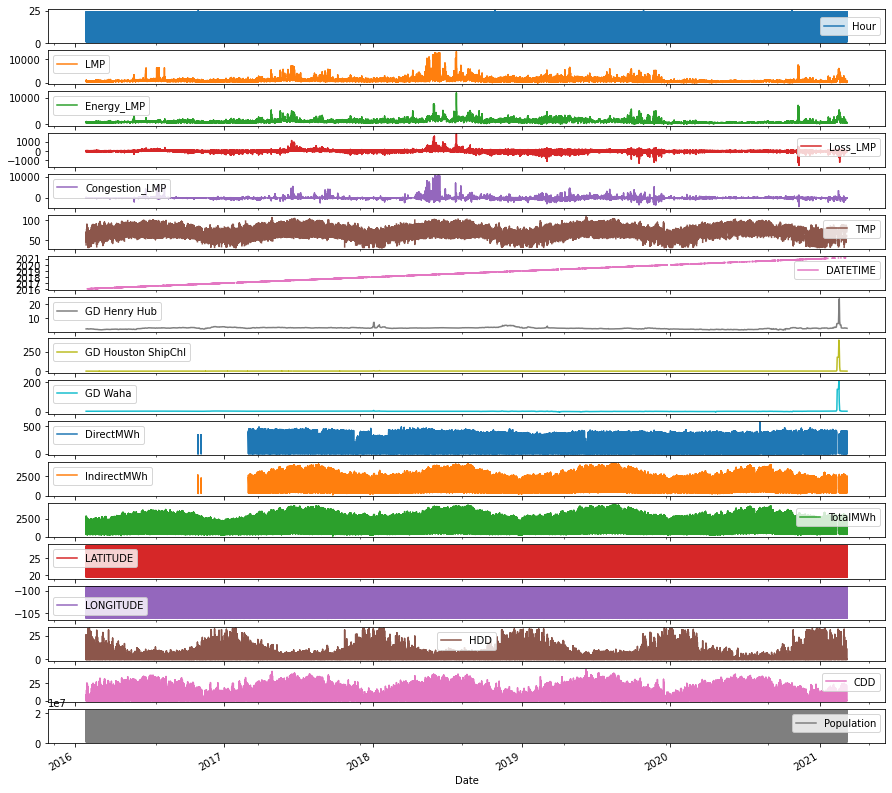

In [16]:
# General Plots to review data over the entire dataset timespan
#price_features.plot(x="Date", figsize=(15,4))
price_features.plot(x="Date", subplots=True, figsize=(15,15))


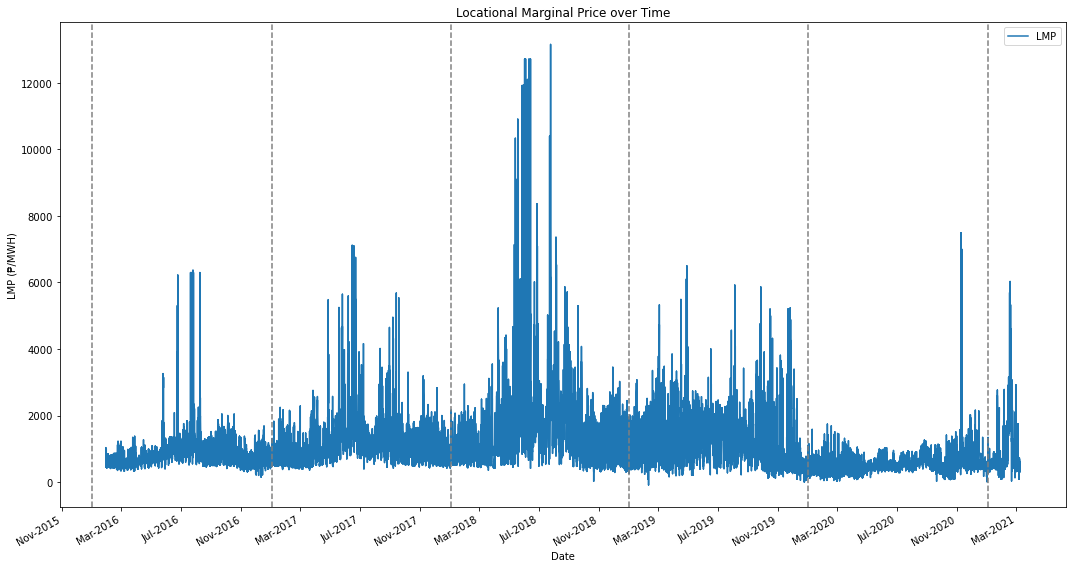

In [17]:
import matplotlib.dates as dates
ax = price_features.plot(x="Date", y="LMP", figsize=(15,8))
plt.ylabel('LMP (₱/MWH)')
plt.title('Locational Marginal Price over Time')
plt.axvline(x='2016-01-01 21:00:00', color = '0.5', ls = '--')
plt.axvline(x='2017-01-01 21:00:00', color = '0.5', ls = '--')
plt.axvline(x='2018-01-01 21:00:00', color = '0.5', ls = '--')
plt.axvline(x='2019-01-01 21:00:00', color = '0.5', ls = '--')
plt.axvline(x='2020-01-01 21:00:00', color = '0.5', ls = '--')
plt.axvline(x='2021-01-01 21:00:00', color = '0.5', ls = '--')
ax.xaxis.set_major_formatter(dates.DateFormatter("%b-%Y"))
ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
plt.tight_layout()
plt.savefig('LMP2.png')
plt.show()

PLOT 1 - Subplots the different columns. Can tell more from here. The temperature data is incomplete. The pandemic is noticable in the energy columns for the year 2020. The freeze storm that rattled the energy market can be seen in 2021 and is skewing the indeces for the natural gas price plots. <br>
PLOT 2 - Shows the target variable through the data set.

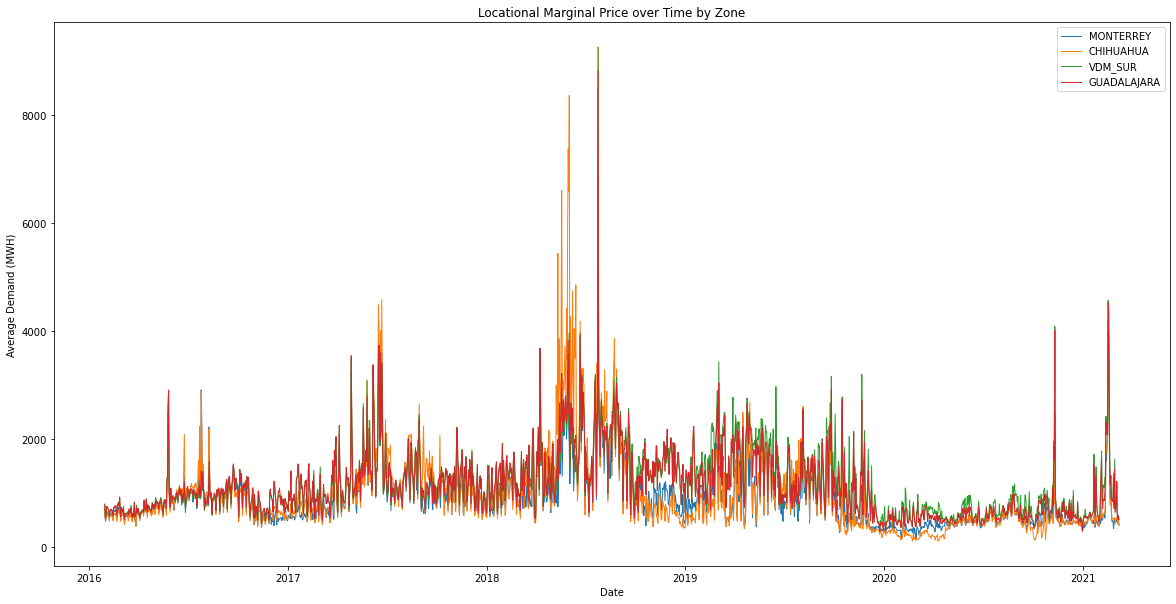

In [18]:
MONTERREY = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
CHIHUAHUA = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
VDM_SUR = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
GUADALAJARA = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()

plt.figure(figsize=(20,10))

plt.plot(MONTERREY.index, MONTERREY.LMP, linewidth=1, label='MONTERREY')
plt.legend()
plt.plot(CHIHUAHUA.index, CHIHUAHUA.LMP, linewidth=1, label='CHIHUAHUA')
plt.legend()
plt.plot(VDM_SUR.index, VDM_SUR.LMP, linewidth=1, label='VDM_SUR')
plt.legend()
plt.plot(GUADALAJARA.index, GUADALAJARA.LMP, linewidth=1, label='GUADALAJARA')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Demand (MWH)')
plt.title('Locational Marginal Price over Time by Zone')
plt.savefig('lmpbyzone.png')
plt.show()


#### Daily Average of Price Components Over Time

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

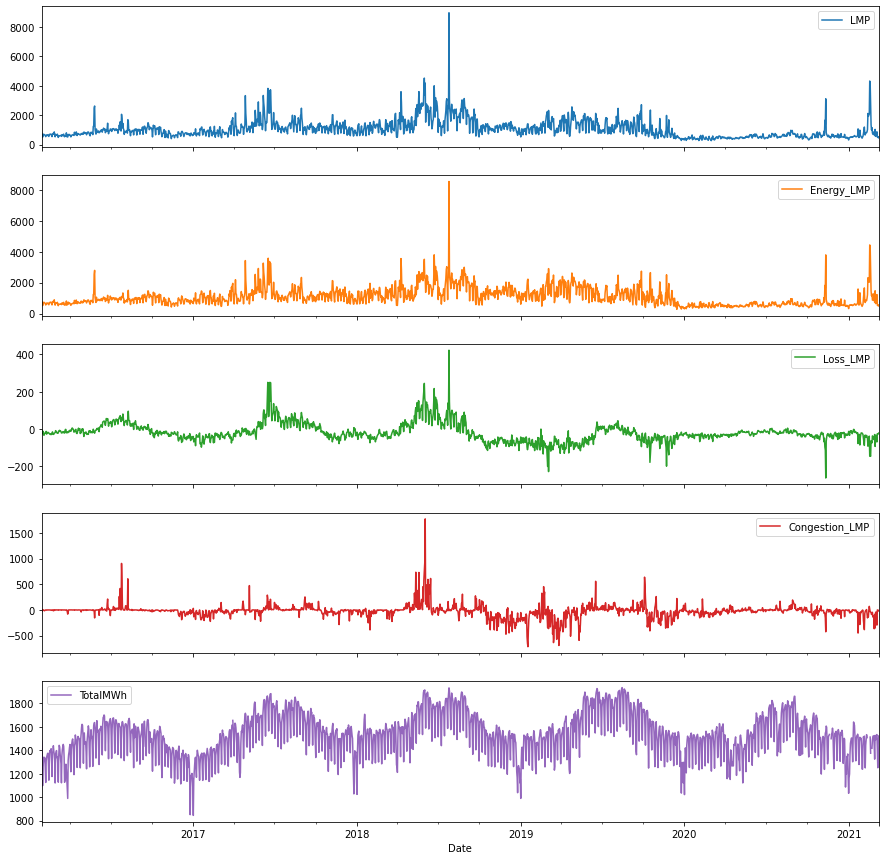

In [19]:
adp = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
adp.plot(subplots=True, figsize=(15,15))

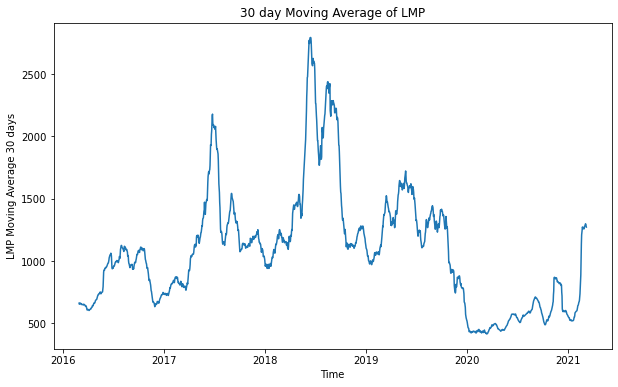

In [20]:
tdp = temp_price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
plt.figure(figsize=(10,6))
plt.plot(tdp['LMP'].rolling(30).mean(),label= 'MA 30 days')
plt.xlabel('Time')
plt.ylabel('LMP Moving Average 30 days')
plt.title('30 day Moving Average of LMP')
plt.show()

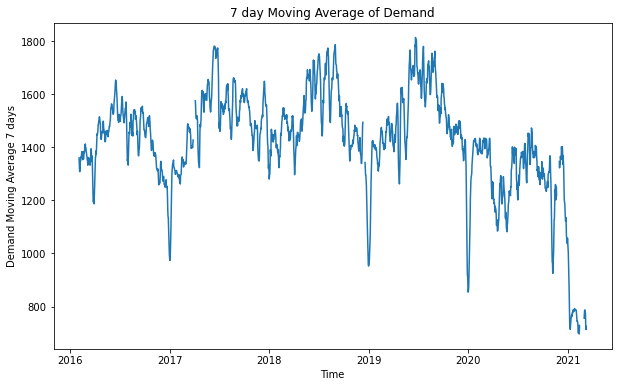

In [21]:
plt.figure(figsize=(10,6))
plt.plot(tdp['TotalMWh'].rolling(7).mean(),label= 'MA 7 days')
plt.xlabel('Time')
plt.ylabel('Demand Moving Average 7 days')
plt.title('7 day Moving Average of Demand')
plt.show()

#### Demand by Season

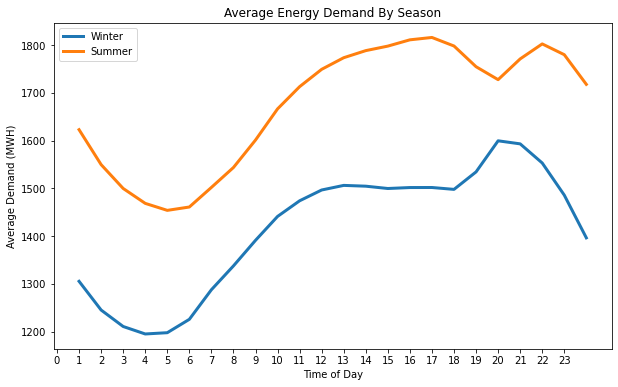

In [22]:
winter_hourly_demand = price_features[(price_features['Season'] == 'WINTER')].groupby('Hour')['TotalMWh'].mean()
summer_hourly_demand = price_features[(price_features['Season'] == 'SUMMER')].groupby('Hour')['TotalMWh'].mean()

plt.figure(figsize=(10,6))
plt.plot(winter_hourly_demand.index, winter_hourly_demand.values, linewidth=3, label='Winter')
plt.legend()
plt.plot(summer_hourly_demand.index, summer_hourly_demand.values, linewidth=3, label='Summer')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Demand (MWH)')
plt.title('Average Energy Demand By Season')
plt.xticks(range(24))
plt.savefig('demandbyhour.png')
plt.show()

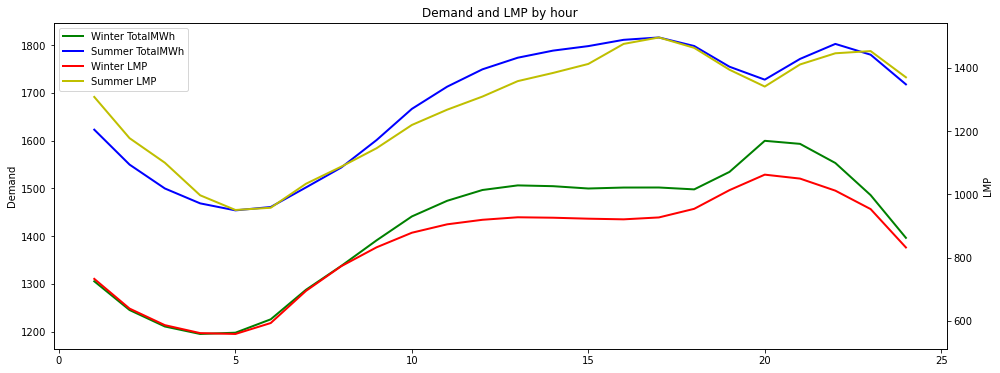

In [23]:
winter_hourly = price_features[(price_features['Season'] == 'WINTER')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
summer_hourly = price_features[(price_features['Season'] == 'SUMMER')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(winter_hourly.TotalMWh, linewidth=2, label='Winter TotalMWh', color = 'g')
lns2 = ax1.plot(summer_hourly.TotalMWh, linewidth=2, label='Summer TotalMWh', color = 'b')
lns3 = ax2.plot(winter_hourly.LMP, linewidth=2, label='Winter LMP', color ='r')
lns4 = ax2.plot(summer_hourly.LMP, linewidth=2, label='Summer LMP', color ='y')

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.xlabel('Time of Day')
ax1.set_ylabel('Demand')
ax2.set_ylabel('LMP')
plt.title('Demand and LMP by hour')
plt.savefig('demandlmphour.png')
plt.show()

#### Degree Days and Price Components

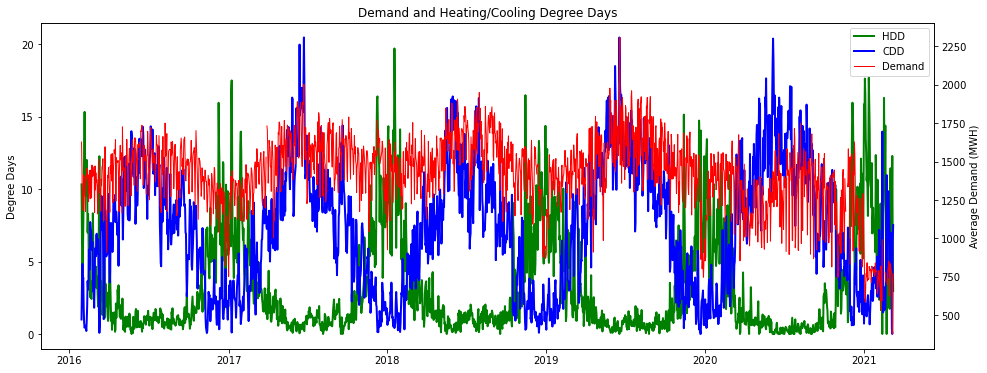

In [24]:
add = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'TotalMWh']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()
lns1 = ax1.plot(add.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(add.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(add.TotalMWh, linewidth=1, label='Demand', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Demand (MWH)')
plt.title('Demand and Heating/Cooling Degree Days')
plt.savefig('degreedaysdemand.png')
plt.show()

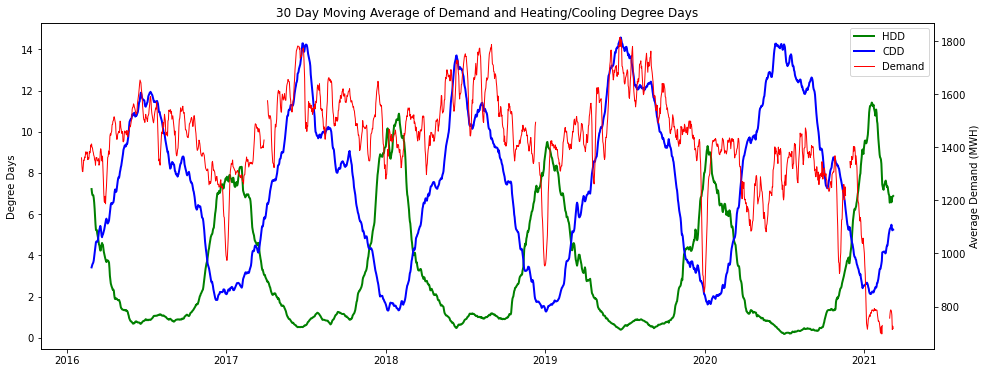

In [25]:
add = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'TotalMWh']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()
lns1 = ax1.plot(add.HDD.rolling(30).mean(), linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(add.CDD.rolling(30).mean(), linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(add.TotalMWh.rolling(7).mean(), linewidth=1, label='Demand', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Demand (MWH)')
plt.title('30 Day Moving Average of Demand and Heating/Cooling Degree Days')
plt.savefig('degreedaysdemandMA.png')
plt.show()

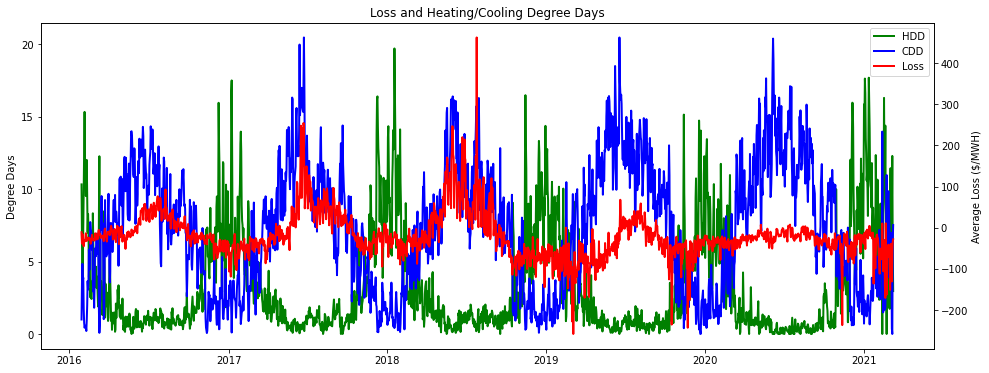

In [26]:
adl = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Loss_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adl.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(adl.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(adl.Loss_LMP, linewidth=2, label='Loss', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Loss ($/MWH)')
plt.title('Loss and Heating/Cooling Degree Days')
plt.savefig('degreedaysloss.png')
plt.show()

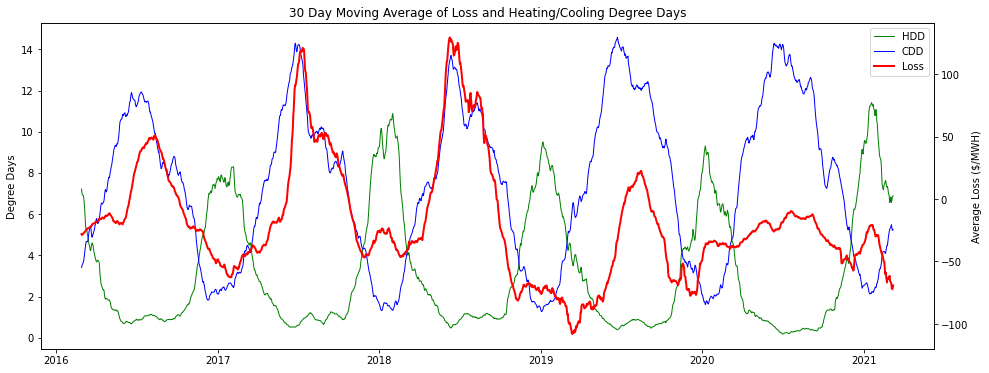

In [27]:
fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adl.HDD.rolling(30).mean(), linewidth=1, label='HDD', color = 'g')
lns2 = ax1.plot(adl.CDD.rolling(30).mean(), linewidth=1, label='CDD', color = 'b')
lns3 = ax2.plot(adl.Loss_LMP.rolling(30).mean(), linewidth=2, label='Loss', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Loss ($/MWH)')
plt.title('30 Day Moving Average of Loss and Heating/Cooling Degree Days')
plt.savefig('MAdegreedaysloss.png')
plt.show()

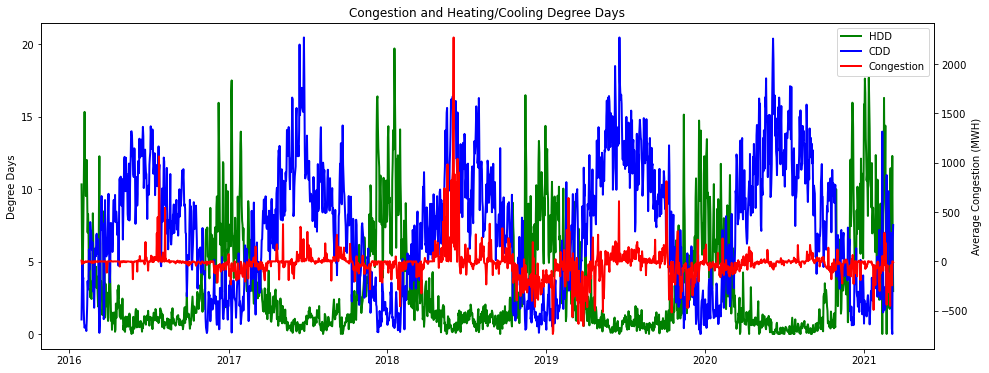

In [28]:
adc = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Congestion_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adc.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(adc.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(adc.Congestion_LMP, linewidth=2, label='Congestion', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Congestion (MWH)')
plt.title('Congestion and Heating/Cooling Degree Days')
plt.show()

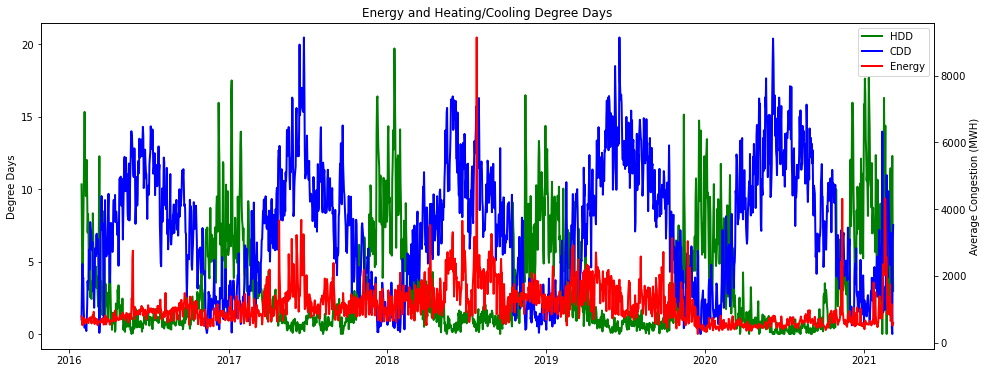

In [29]:
ade = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Energy_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(ade.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(ade.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(ade.Energy_LMP, linewidth=2, label='Energy', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Congestion (MWH)')
plt.title('Energy and Heating/Cooling Degree Days')
plt.show()

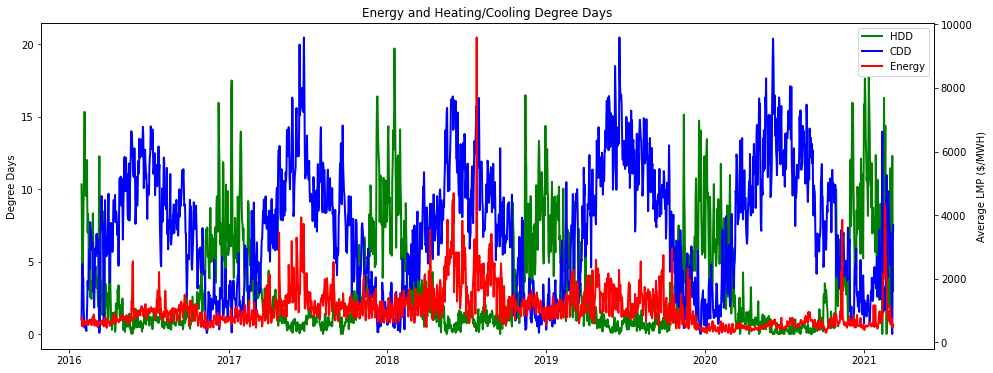

In [30]:
adlmp = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adlmp.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(adlmp.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(adlmp.LMP, linewidth=2, label='Energy', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average LMP ($/MWH)')
plt.title('Energy and Heating/Cooling Degree Days')
plt.show()

#### Daily Average of Price Components By Hour

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>,
       <AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>,
       <AxesSubplot:xlabel='Hour'>], dtype=object)

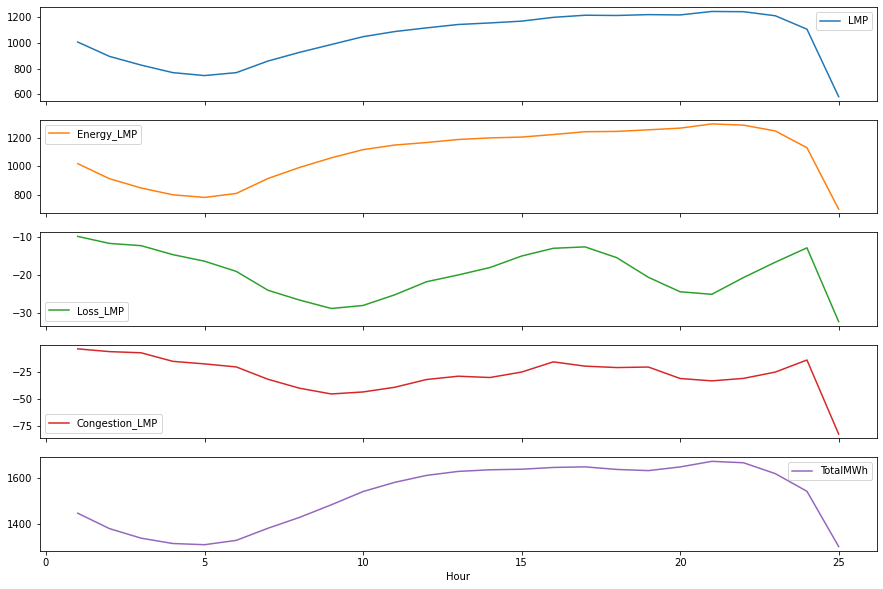

In [31]:
adp = price_features.groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
adp.plot(subplots=True, figsize=(15,10), rot = 0)

25th Hour corresponds to DST and is therefore skewed towards November and March

#### Zone Analysis of Daily Average of Price Components 

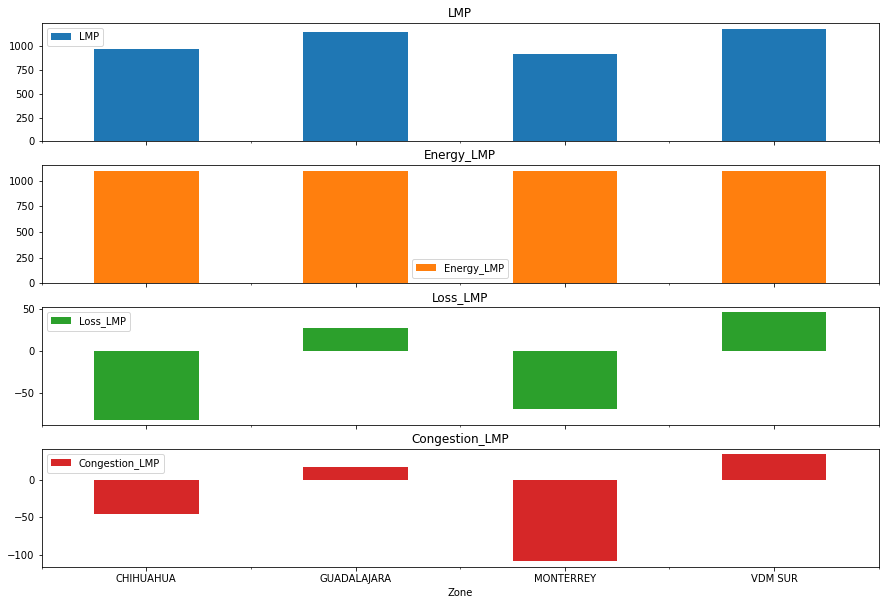

In [32]:
zdp = price_features.groupby('Zone')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP']].mean()
zdp.plot(subplots=True, figsize=(15,10), kind = 'bar', rot = 0)
plt.savefig('zonalpricecomponents.png')

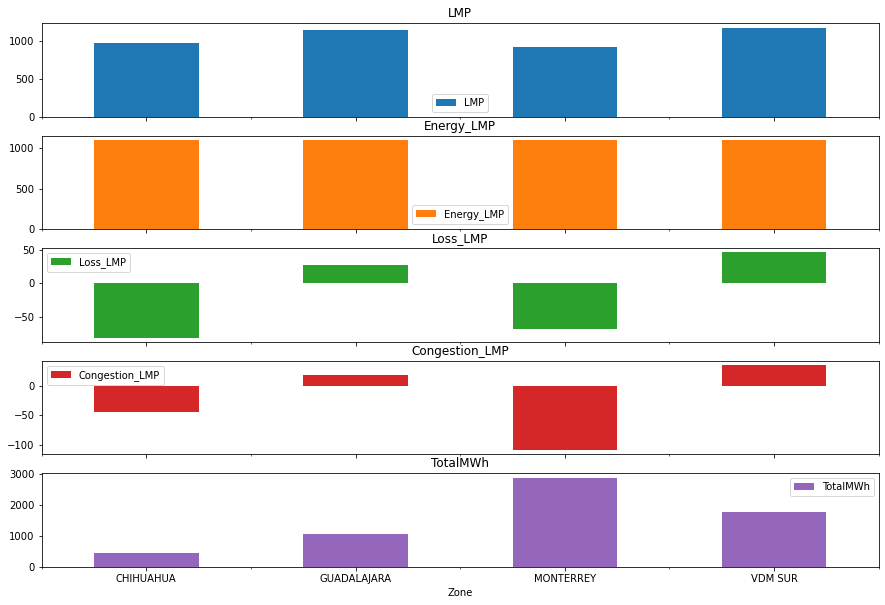

In [33]:
zdp = price_features.groupby('Zone')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP','TotalMWh']].mean()
zdp.plot(subplots=True, figsize=(15,10), kind = 'bar', rot = 0)
plt.savefig('zonalpricecomponentsanddemand.png')

Here we can see how to Loss and Congestion component of the price are highly influenced by zone.

In [34]:
zdp

LMP   Energy_LMP   Loss_LMP  Congestion_LMP     TotalMWh
Zone                                                                         
CHIHUAHUA     972.115818  1098.486044 -81.528866      -44.841816   440.125144
GUADALAJARA  1144.578465  1098.613320  28.155126       17.810578  1066.237856
MONTERREY     920.500688  1098.603611 -68.834907     -109.268610  2872.251383
VDM SUR      1180.267179  1098.606584  46.474941       35.186113  1747.698471

## Zone Statistical Testing 

In [35]:
from scipy import stats
lmp_anova = price_features[['LMP','Zone']]
grps = pd.unique(lmp_anova.Zone.values)
d_data = {grp:lmp_anova['LMP'][lmp_anova.Zone == grp] for grp in grps}

#d_data
F, p = stats.f_oneway(d_data['MONTERREY'], d_data['VDM SUR'], d_data['CHIHUAHUA'], d_data['GUADALAJARA'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


In [36]:
lmp_anova = price_features[['Energy_LMP','Zone']]
grps = pd.unique(lmp_anova.Zone.values)
d_data = {grp:lmp_anova['Energy_LMP'][lmp_anova.Zone == grp] for grp in grps}
 
#d_data
F, p = stats.f_oneway(d_data['MONTERREY'], d_data['VDM SUR'], d_data['CHIHUAHUA'], d_data['GUADALAJARA'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.9999900085768858
accept null hypothesis


In [37]:
losslmp_anova = price_features[['Loss_LMP','Zone']]
grps = pd.unique(losslmp_anova.Zone.values)
d_data = {grp:losslmp_anova['Loss_LMP'][losslmp_anova.Zone == grp] for grp in grps}
 
#d_data
F, p = stats.f_oneway(d_data['MONTERREY'], d_data['VDM SUR'], d_data['CHIHUAHUA'], d_data['GUADALAJARA'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


In [38]:
congestionlmp_anova = price_features[['Congestion_LMP','Zone']]
grps = pd.unique(congestionlmp_anova.Zone.values)
d_data = {grp:congestionlmp_anova['Congestion_LMP'][congestionlmp_anova.Zone == grp] for grp in grps}
 
#d_data
F, p = stats.f_oneway(d_data['MONTERREY'], d_data['VDM SUR'], d_data['CHIHUAHUA'], d_data['GUADALAJARA'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


In [39]:
demandlmp_anova = price_features[['TotalMWh','Zone']]
grps = pd.unique(demandlmp_anova.Zone.values)
d_data = {grp:demandlmp_anova['TotalMWh'][demandlmp_anova.Zone == grp] for grp in grps}
 
#d_data
F, p = stats.f_oneway(d_data['MONTERREY'], d_data['VDM SUR'], d_data['CHIHUAHUA'], d_data['GUADALAJARA'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  nan
accept null hypothesis


In [66]:
d_data

{'MONTERREY': 0         1667.390
 4         1665.630
 8         1609.930
 12        1705.680
 16        1811.530
             ...   
 179209    3073.618
 179213    3082.892
 179217    3115.496
 179221    3169.724
 179225    3180.912
 Name: TotalMWh, Length: 44807, dtype: float64,
 'VDM SUR': 1         2299.714
 5         2297.354
 9         2220.049
 13        2059.419
 17        1858.319
             ...   
 179210    1601.591
 179214    1588.006
 179218    1580.602
 179222    1577.532
 179226    1570.138
 Name: TotalMWh, Length: 44807, dtype: float64,
 'CHIHUAHUA': 2         437.740
 6         435.140
 10        418.860
 14        403.360
 18        383.100
            ...   
 179207    535.752
 179211    531.939
 179215    527.814
 179219    527.058
 179223    526.482
 Name: TotalMWh, Length: 44807, dtype: float64,
 'GUADALAJARA': 3         1184.613
 7         1136.742
 11        1094.312
 15        1029.547
 19         942.111
             ...   
 179208    1048.817
 179212    1049

In [40]:
demandlmp_anova.describe()

TotalMWh
count  177974.000000
mean     1531.583443
std       957.975138
min       110.478000
25%       660.994500
50%      1307.921000
75%      2107.479250
max      4443.185000

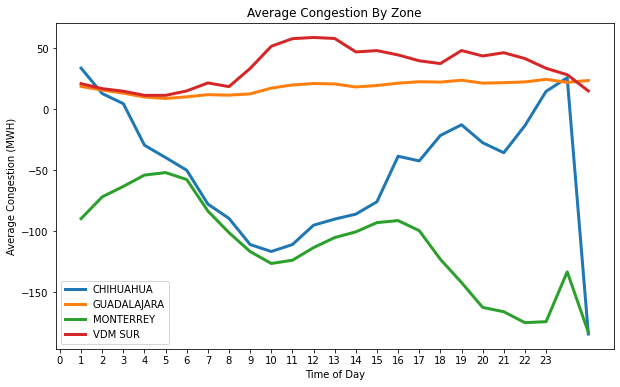

In [41]:
c_hourly = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
g_hourly = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
m_hourly = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
v_hourly = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()

#c_hourly.plot(subplots=True, figsize=(15,10), rot = 0)

plt.figure(figsize=(10,6))
plt.plot(c_hourly.index, c_hourly.Congestion_LMP, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly.index, g_hourly.Congestion_LMP, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly.index, m_hourly.Congestion_LMP, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly.index, v_hourly.Congestion_LMP, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Congestion (MWH)')
plt.title('Average Congestion By Zone')
plt.xticks(range(24))
plt.savefig('Congestionbyzone.png')
plt.show()

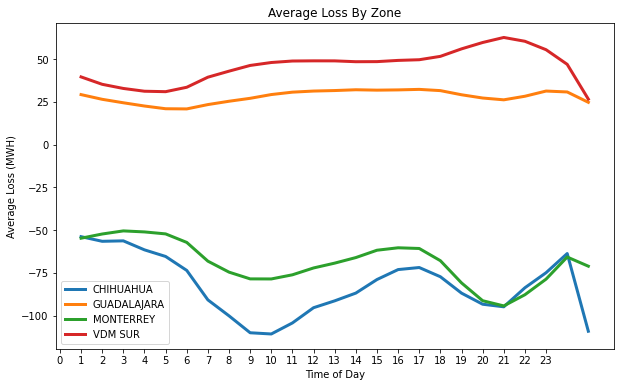

In [42]:
plt.figure(figsize=(10,6))
plt.plot(c_hourly.index, c_hourly.Loss_LMP, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly.index, g_hourly.Loss_LMP, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly.index, m_hourly.Loss_LMP, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly.index, v_hourly.Loss_LMP, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Loss (MWH)')
plt.title('Average Loss By Zone')
plt.xticks(range(24))
plt.savefig('Lossbyzone.png')
plt.show()

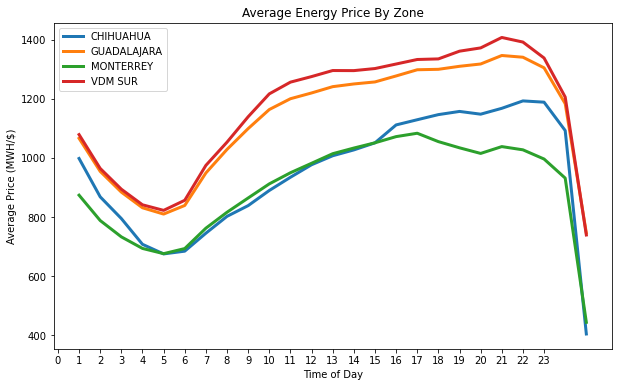

In [43]:
c_hourly_price = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')['LMP'].mean()
g_hourly_price = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')['LMP'].mean()
m_hourly_price = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')['LMP'].mean()
v_hourly_price = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')['LMP'].mean()

plt.figure(figsize=(10,6))
plt.plot(c_hourly_price.index, c_hourly_price.values, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly_price.index, g_hourly_price.values, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly_price.index, m_hourly_price.values, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly_price.index, v_hourly_price.values, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Price (MWH/$)')
plt.title('Average Energy Price By Zone')
plt.xticks(range(24))
plt.savefig('pricebyzone.png')
plt.show()

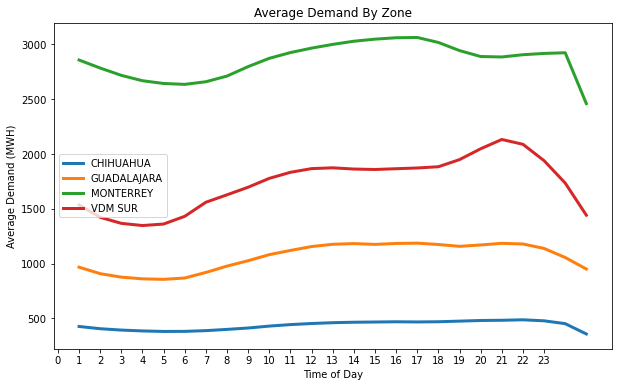

In [44]:
c_hourly_demand = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')['TotalMWh'].mean()
g_hourly_demand = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')['TotalMWh'].mean()
m_hourly_demand = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')['TotalMWh'].mean()
v_hourly_demand = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')['TotalMWh'].mean()

plt.figure(figsize=(10,6))
plt.plot(c_hourly_demand.index, c_hourly_demand.values, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly_demand.index, g_hourly_demand.values, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly_demand.index, m_hourly_demand.values, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly_demand.index, v_hourly_demand.values, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Demand (MWH)')
plt.title('Average Demand By Zone')
plt.xticks(range(24))
plt.savefig('Demandbyzone.png')
plt.show()

#### NG Price Analysis 

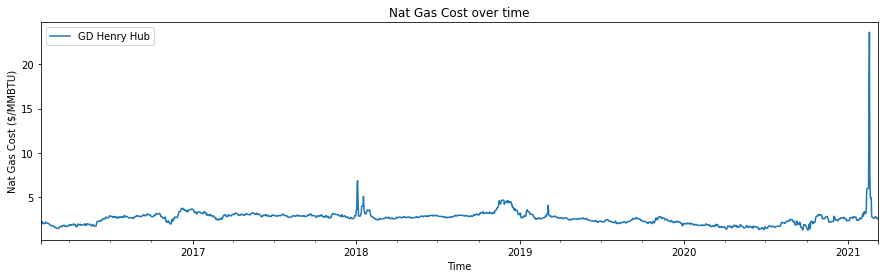

In [45]:
ngdp = price_features.groupby('Date')[['GD Henry Hub']].mean()
ngdp.plot(y="GD Henry Hub", figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Nat Gas Cost ($/MMBTU)')
plt.title('Nat Gas Cost over time')
plt.show()

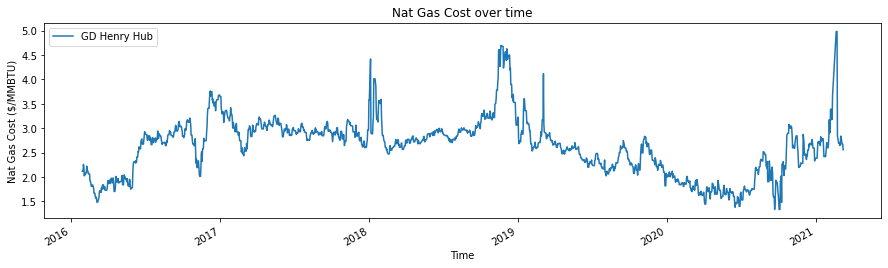

In [46]:
ngdp_rev = ngdp[ngdp['GD Henry Hub'] < 5]
ngdp_rev.plot(y="GD Henry Hub", figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Nat Gas Cost ($/MMBTU)')
plt.title('Nat Gas Cost over time')
plt.show()

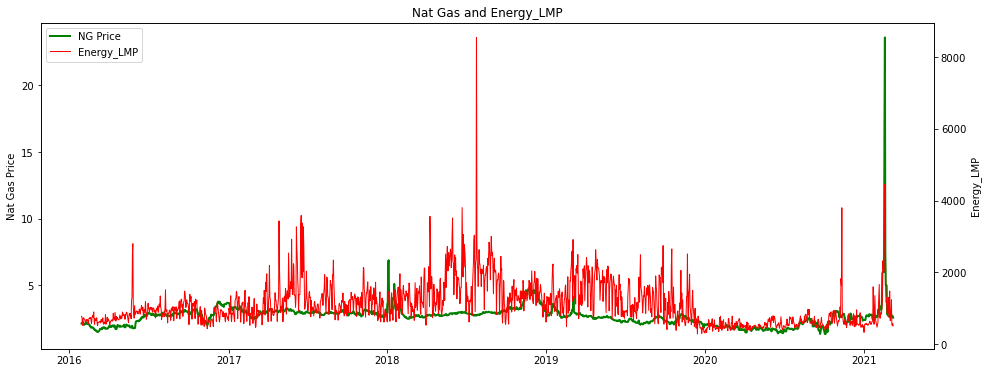

In [47]:
ngedp = price_features.groupby('Date')[['GD Henry Hub', 'Energy_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(ngedp['GD Henry Hub'], linewidth=2, label='NG Price', color = 'g')
lns3 = ax2.plot(ngedp.Energy_LMP, linewidth=1, label='Energy_LMP', color ='r')

lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Nat Gas Price')
ax2.set_ylabel('Energy_LMP')
plt.title('Nat Gas and Energy_LMP')
plt.show()

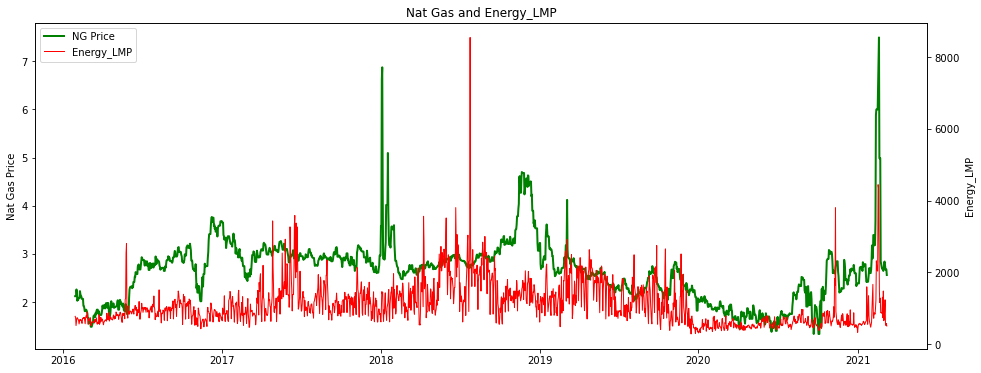

In [48]:
fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(ngedp[ngedp['GD Henry Hub'] < 15]['GD Henry Hub'], linewidth=2, label='NG Price', color = 'g')
lns3 = ax2.plot(ngedp.Energy_LMP, linewidth=1, label='Energy_LMP', color ='r')

lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Nat Gas Price')
ax2.set_ylabel('Energy_LMP')
plt.title('Nat Gas and Energy_LMP')
plt.savefig('NGpriceEnergyLMP.png')
plt.show()

#### Scatter of AVG Temp and Price Components per day

<AxesSubplot:xlabel='Date'>

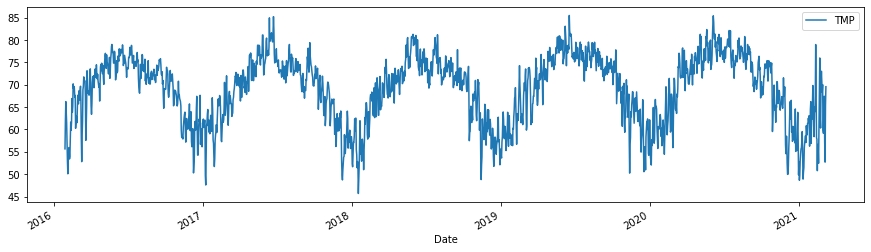

In [49]:
adl = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Loss_LMP']].mean()
tdp = temp_price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh']].mean()
#tdp.plot(x = 'TMP', y = 'LMP', subplots=True, figsize=(15,10), kind = 'scatter', rot = 0)
tdp.plot(y="TMP", figsize=(15,4))

Note from first go around "It looks like we have some non realistic temperature averages. Let's examine them."<br>
This has since been corrected by removing bad readings from initial weather data set.

In [50]:
tdp.TMP.sort_values(ascending = False).head(5)

Date
2019-06-18    85.485714
2020-06-05    85.407059
2017-06-23    85.217692
2017-06-13    84.947000
2020-06-06    83.950000
Name: TMP, dtype: float64

Top value looks low. Lets take a look at the temps for that date.

In [51]:
filtered_temp = price_features[price_features['TMP'].notnull()]
filtered_temp[filtered_temp['Date'] == '2019-06-18']

Date  Hour       Zone      LMP  Energy_LMP  Loss_LMP  \
103276 2019-06-18     1  CHIHUAHUA  2005.73     1970.62     35.11   
103278 2019-06-18     1  MONTERREY  1905.87     1970.62    -64.75   
103561 2019-06-18     4  CHIHUAHUA  1373.94     1382.25     -8.30   
103563 2019-06-18     4  MONTERREY  1302.96     1382.25    -79.29   
103585 2019-06-18    10  CHIHUAHUA  1522.71     1639.82   -117.11   
103597 2019-06-18    13  CHIHUAHUA  1807.03     1706.89    -55.85   
103599 2019-06-18    13  MONTERREY  1748.77     1706.89   -101.39   
103609 2019-06-18    16  CHIHUAHUA  2230.09     2221.79      8.30   
103611 2019-06-18    16  MONTERREY  2148.52     2221.79    -73.27   
103621 2019-06-18    19  CHIHUAHUA  2107.82     2080.47     27.35   
103623 2019-06-18    19  MONTERREY  1986.03     2080.47    -94.44   
103633 2019-06-18    22  CHIHUAHUA  2084.62     2013.91     70.71   
103635 2019-06-18    22  MONTERREY  1923.28     2013.91    -90.63   
103636 2019-06-18    22    VDM SUR  2125.42     2013.91    111.51   

        Congestion_LMP    TMP            DATETIME      Time  ...  DirectMWh  \
103276            0.00  97.88 2019-06-18 00:00:00  00:00:00  ...       0.00   
103278            0.00  91.40 2019-06-18 00:00:00  00:00:00  ...     354.33   
103561            0.00  86.00 2019-06-18 03:00:00  03:00:00  ...       0.00   
103563            0.00  84.56 2019-06-18 03:00:00  03:00:00  ...     351.29   
103585            0.00  75.20 2019-06-18 09:00:00  09:00:00  ...       0.00   
103597          155.98  70.34 2019-06-18 12:00:00  12:00:00  ...       0.00   
103599          143.27  76.64 2019-06-18 12:00:00  12:00:00  ...     379.46   
103609            0.00  80.24 2019-06-18 15:00:00  15:00:00  ...       0.00   
103611            0.00  80.24 2019-06-18 15:00:00  15:00:00  ...     406.47   
103621            0.00  88.88 2019-06-18 18:00:00  18:00:00  ...       0.00   
103623            0.00  91.40 2019-06-18 18:00:00  18:00:00  ...     385.45   
103633            0.00  94.64 2019-06-18 21:00:00  21:00:00  ...       0.00   
103635            0.00  96.80 2019-06-18 21:00:00  21:00:00  ...     384.15   
103636            0.00  82.58 2019-06-18 21:00:00  21:00:00  ...       0.00   

        IndirectMWh  TotalMWh    Type   LATITUDE   LONGITUDE  HDD    CDD  \
103276      533.839   533.839  Energy  28.633333 -106.083333  0.0  32.88   
103278     3514.848  3869.178  Energy  25.733333 -100.300000  0.0  26.40   
103561      476.903   476.903  Energy  28.633333 -106.083333  0.0  21.00   
103563     3191.434  3542.724  Energy  25.733333 -100.300000  0.0  19.56   
103585      521.712   521.712  Energy  28.633333 -106.083333  0.0  10.20   
103597      587.651   587.651  Energy  28.633333 -106.083333  0.0   5.34   
103599     3569.190  3948.650  Energy  25.733333 -100.300000  0.0  11.64   
103609      612.863   612.863  Energy  28.633333 -106.083333  0.0  15.24   
103611     3797.564  4204.034  Energy  25.733333 -100.300000  0.0  15.24   
103621      616.183   616.183  Energy  28.633333 -106.083333  0.0  23.88   
103623     3637.973  4023.423  Energy  25.733333 -100.300000  0.0  26.40   
103633      599.973   599.973  Energy  28.633333 -106.083333  0.0  29.64   
103635     3524.613  3908.763  Energy  25.733333 -100.300000  0.0  31.80   
103636     2263.218  2263.218  Energy  19.400000  -99.183333  0.0  17.58   

        Season  Population  
103276  SUMMER     1036806  
103278  SUMMER     5341171  
103561  SUMMER     1036806  
103563  SUMMER     5341171  
103585  SUMMER     1036806  
103597  SUMMER     1036806  
103599  SUMMER     5341171  
103609  SUMMER     1036806  
103611  SUMMER     5341171  
103621  SUMMER     1036806  
103623  SUMMER     5341171  
103633  SUMMER     1036806  
103635  SUMMER     5341171  
103636  SUMMER    21804515  

[14 rows x 23 columns]

#### Scatter of AVG LMP vs Index Gas Price

<AxesSubplot:xlabel='GD Waha', ylabel='Energy_LMP'>

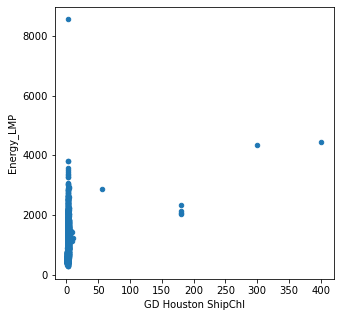

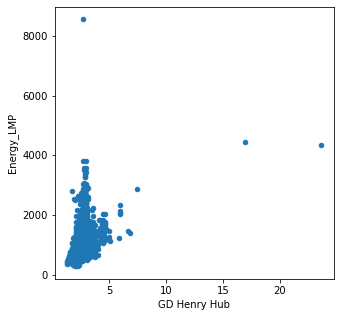

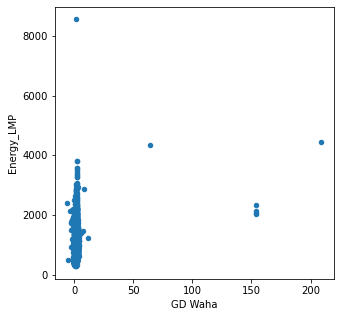

In [52]:
price_index = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'GD Henry Hub','GD Houston ShipChl','GD Waha']].mean()
price_index.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#fig.tight_layout()

Outliers are hiding the relationship. Going to remove any price over $10

In [53]:
price_index_rev = price_index[price_index['GD Henry Hub'] < 10]
price_index_rev = price_index_rev[price_index['GD Houston ShipChl'] < 10]
price_index_rev = price_index_rev[price_index['GD Waha'] < 10]

<ipython-input-53-07ed700803f9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_index_rev = price_index_rev[price_index['GD Houston ShipChl'] < 10]
<ipython-input-53-07ed700803f9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_index_rev = price_index_rev[price_index['GD Waha'] < 10]


<AxesSubplot:xlabel='GD Waha', ylabel='Energy_LMP'>

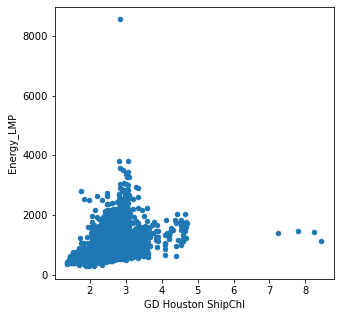

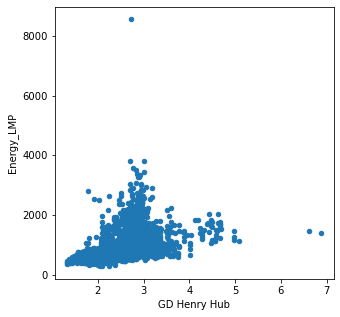

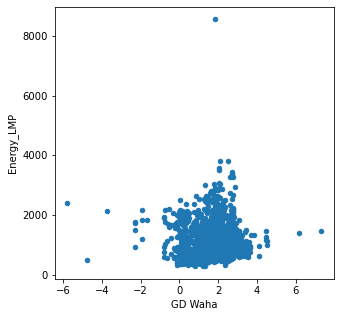

In [54]:
price_index_rev.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

Henry Hub appears to have the strongest correlation and the most realisting prices. Might choose this price index.

#### Correlations 

In [55]:
price_features.corr()

Hour       LMP  Energy_LMP  Loss_LMP  Congestion_LMP  \
Hour                1.000000  0.185916    0.213606 -0.006726       -0.009085   
LMP                 0.185916  1.000000    0.865855  0.396728        0.407154   
Energy_LMP          0.213606  0.865855    1.000000  0.075041       -0.087953   
Loss_LMP           -0.006726  0.396728    0.075041  1.000000        0.453077   
Congestion_LMP     -0.009085  0.407154   -0.087953  0.453077        1.000000   
TMP                 0.073663  0.191477    0.132252  0.161336        0.124649   
GD Henry Hub        0.000054  0.301387    0.365393 -0.044856       -0.043988   
GD Houston ShipChl -0.000002  0.165447    0.193573 -0.045740       -0.002622   
GD Waha            -0.000001  0.129209    0.146975 -0.023780        0.003037   
DirectMWh          -0.009820 -0.114201   -0.007066 -0.288961       -0.162054   
IndirectMWh         0.123121  0.109039    0.135843  0.060332       -0.047215   
TotalMWh            0.109842  0.090802    0.126873  0.029490       -0.061542   
LATITUDE            0.000005 -0.133148   -0.000063 -0.539103       -0.138683   
LONGITUDE           0.000003  0.041818    0.000062  0.259731        0.013973   
HDD                -0.025065 -0.045562   -0.021426 -0.078737       -0.036790   
CDD                 0.010085  0.102545    0.076705  0.053999        0.062903   
Population          0.000004  0.081442    0.000032  0.330666        0.084543   

                         TMP  GD Henry Hub  GD Houston ShipChl       GD Waha  \
Hour                0.073663      0.000054       -1.889855e-06 -1.403787e-06   
LMP                 0.191477      0.301387        1.654466e-01  1.292095e-01   
Energy_LMP          0.132252      0.365393        1.935727e-01  1.469750e-01   
Loss_LMP            0.161336     -0.044856       -4.573958e-02 -2.378001e-02   
Congestion_LMP      0.124649     -0.043988       -2.622331e-03  3.037299e-03   
TMP                 1.000000     -0.156674       -5.314233e-02 -6.394084e-02   
GD Henry Hub       -0.156674      1.000000        6.700409e-01  4.991503e-01   
GD Houston ShipChl -0.053142      0.670041        1.000000e+00  9.113281e-01   
GD Waha            -0.063941      0.499150        9.113281e-01  1.000000e+00   
DirectMWh           0.198167     -0.007175       -2.003384e-03 -3.173184e-03   
IndirectMWh         0.154030     -0.000528       -1.729424e-03 -4.192012e-03   
TotalMWh            0.179226     -0.000776       -6.261118e-04 -1.456752e-02   
LATITUDE            0.155420     -0.000003       -4.410142e-07 -1.701067e-07   
LONGITUDE          -0.046422     -0.000002       -2.382293e-07 -9.188911e-08   
HDD                -0.792330      0.062397        1.481051e-02  1.827637e-02   
CDD                 0.909925     -0.035920       -1.804366e-02 -1.926439e-02   
Population         -0.180387     -0.000003       -3.972634e-07 -1.532313e-07   

                    DirectMWh  IndirectMWh  TotalMWh      LATITUDE  \
Hour                -0.009820     0.123121  0.109842  4.746674e-06   
LMP                 -0.114201     0.109039  0.090802 -1.331481e-01   
Energy_LMP          -0.007066     0.135843  0.126873 -6.312198e-05   
Loss_LMP            -0.288961     0.060332  0.029490 -5.391034e-01   
Congestion_LMP      -0.162054    -0.047215 -0.061542 -1.386832e-01   
TMP                  0.198167     0.154030  0.179226  1.554203e-01   
GD Henry Hub        -0.007175    -0.000528 -0.000776 -3.104992e-06   
GD Houston ShipChl  -0.002003    -0.001729 -0.000626 -4.410142e-07   
GD Waha             -0.003173    -0.004192 -0.014568 -1.701067e-07   
DirectMWh            1.000000     0.756768  0.820991  3.234356e-01   
IndirectMWh          0.756768     1.000000  0.994515 -2.101583e-01   
TotalMWh             0.820991     0.994515  1.000000 -1.516163e-01   
LATITUDE             0.323436    -0.210158 -0.151616  1.000000e+00   
LONGITUDE            0.409642     0.798158  0.771783 -6.100323e-01   
HDD                 -0.070416    -0.081110 -0.084625  2.210248e-02   
CDD                  0

In [56]:
temp_price_features.corr()

Hour       LMP  Energy_LMP  Loss_LMP  Congestion_LMP  \
Hour                1.000000  0.176450    0.213295 -0.017868       -0.010698   
LMP                 0.176450  1.000000    0.854836  0.425711        0.461424   
Energy_LMP          0.213295  0.854836    1.000000  0.117131       -0.049566   
Loss_LMP           -0.017868  0.425711    0.117131  1.000000        0.422992   
Congestion_LMP     -0.010698  0.461424   -0.049566  0.422992        1.000000   
TMP                 0.073663  0.191477    0.132252  0.161336        0.124649   
GD Henry Hub       -0.003570  0.266027    0.332814 -0.028102       -0.037442   
GD Houston ShipChl  0.002301  0.118943    0.140212 -0.032372        0.005864   
GD Waha             0.000324  0.091872    0.101103 -0.008662        0.013424   
DirectMWh          -0.030840 -0.071778    0.026907 -0.247727       -0.136954   
IndirectMWh         0.113466  0.134102    0.162311  0.099730       -0.040639   
TotalMWh            0.105273  0.112304    0.144168  0.076638       -0.049339   
LATITUDE           -0.008943 -0.116850   -0.007564 -0.498550       -0.095298   
LONGITUDE           0.006591  0.056723    0.023865  0.264602        0.000452   
HDD                -0.005558 -0.134697   -0.081542 -0.184447       -0.088245   
CDD                 0.102929  0.185797    0.136142  0.108314        0.120572   
Population          0.018154  0.086371    0.022158  0.306142        0.057485   

                         TMP  GD Henry Hub  GD Houston ShipChl   GD Waha  \
Hour                0.073663     -0.003570            0.002301  0.000324   
LMP                 0.191477      0.266027            0.118943  0.091872   
Energy_LMP          0.132252      0.332814            0.140212  0.101103   
Loss_LMP            0.161336     -0.028102           -0.032372 -0.008662   
Congestion_LMP      0.124649     -0.037442            0.005864  0.013424   
TMP                 1.000000     -0.156674           -0.053142 -0.063941   
GD Henry Hub       -0.156674      1.000000            0.594195  0.453008   
GD Houston ShipChl -0.053142      0.594195            1.000000  0.904810   
GD Waha            -0.063941      0.453008            0.904810  1.000000   
DirectMWh           0.198167      0.016944           -0.007348 -0.001061   
IndirectMWh         0.154030      0.021975           -0.010697 -0.006629   
TotalMWh            0.179226      0.013667           -0.009568 -0.012791   
LATITUDE            0.155420     -0.002654            0.007244  0.008832   
LONGITUDE          -0.046422      0.004719           -0.028828 -0.027229   
HDD                -0.792330      0.155756            0.066361  0.074969   
CDD                 0.909925     -0.121066           -0.031821 -0.041657   
Population         -0.180387      0.005464           -0.024690 -0.023405   

                    DirectMWh  IndirectMWh  TotalMWh  LATITUDE  LONGITUDE  \
Hour                -0.030840     0.113466  0.105273 -0.008943   0.006591   
LMP                 -0.071778     0.134102  0.112304 -0.116850   0.056723   
Energy_LMP           0.026907     0.162311  0.144168 -0.007564   0.023865   
Loss_LMP            -0.247727     0.099730  0.076638 -0.498550   0.264602   
Congestion_LMP      -0.136954    -0.040639 -0.049339 -0.095298   0.000452   
TMP                  0.198167     0.154030  0.179226  0.155420  -0.046422   
GD Henry Hub         0.016944     0.021975  0.013667 -0.002654   0.004719   
GD Houston ShipChl  -0.007348    -0.010697 -0.009568  0.007244  -0.028828   
GD Waha             -0.001061    -0.006629 -0.012791  0.008832  -0.027229   
DirectMWh            1.000000     0.748226  0.810860  0.260811   0.411361   
IndirectMWh          0.748226     1.000000  0.994981 -0.295964   0.823300   
TotalMWh             0.810860     0.994981  1.000000 -0.237197   0.796201   
LATITUDE             0.260811    -0.295964 -0.237197  1.000000  -0.650336   
LONGITUDE            0.411361     0.823300  0.796201 -0.650336   1.000000   
HDD                 -0.111365    -0.135187 -0.145215  0.028

#### Correlation Heat Map

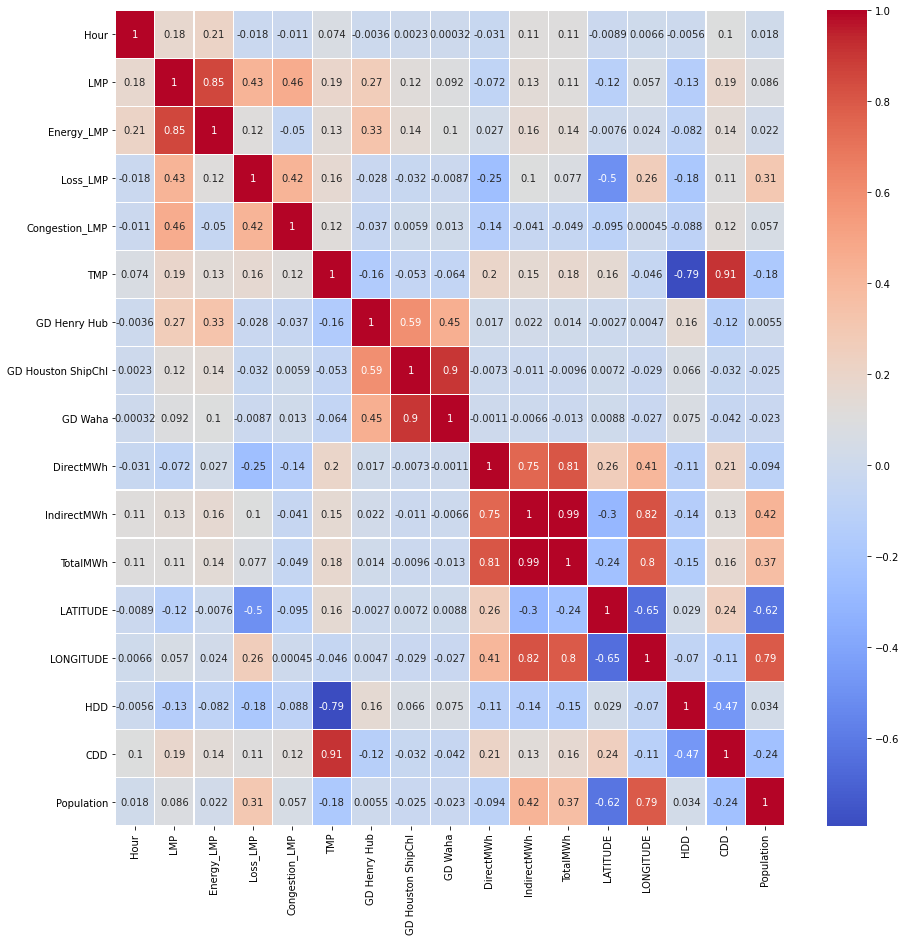

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_price_features.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

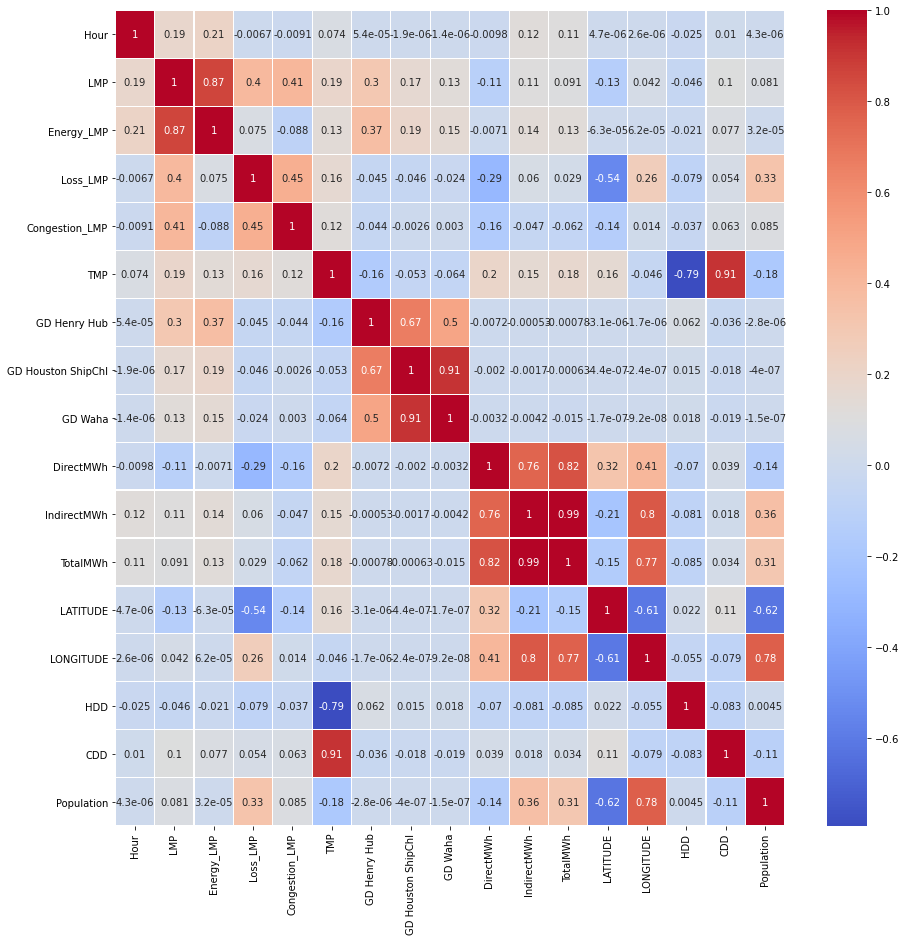

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(price_features.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);
plt.savefig('heatmap.png')

#### Pairplot

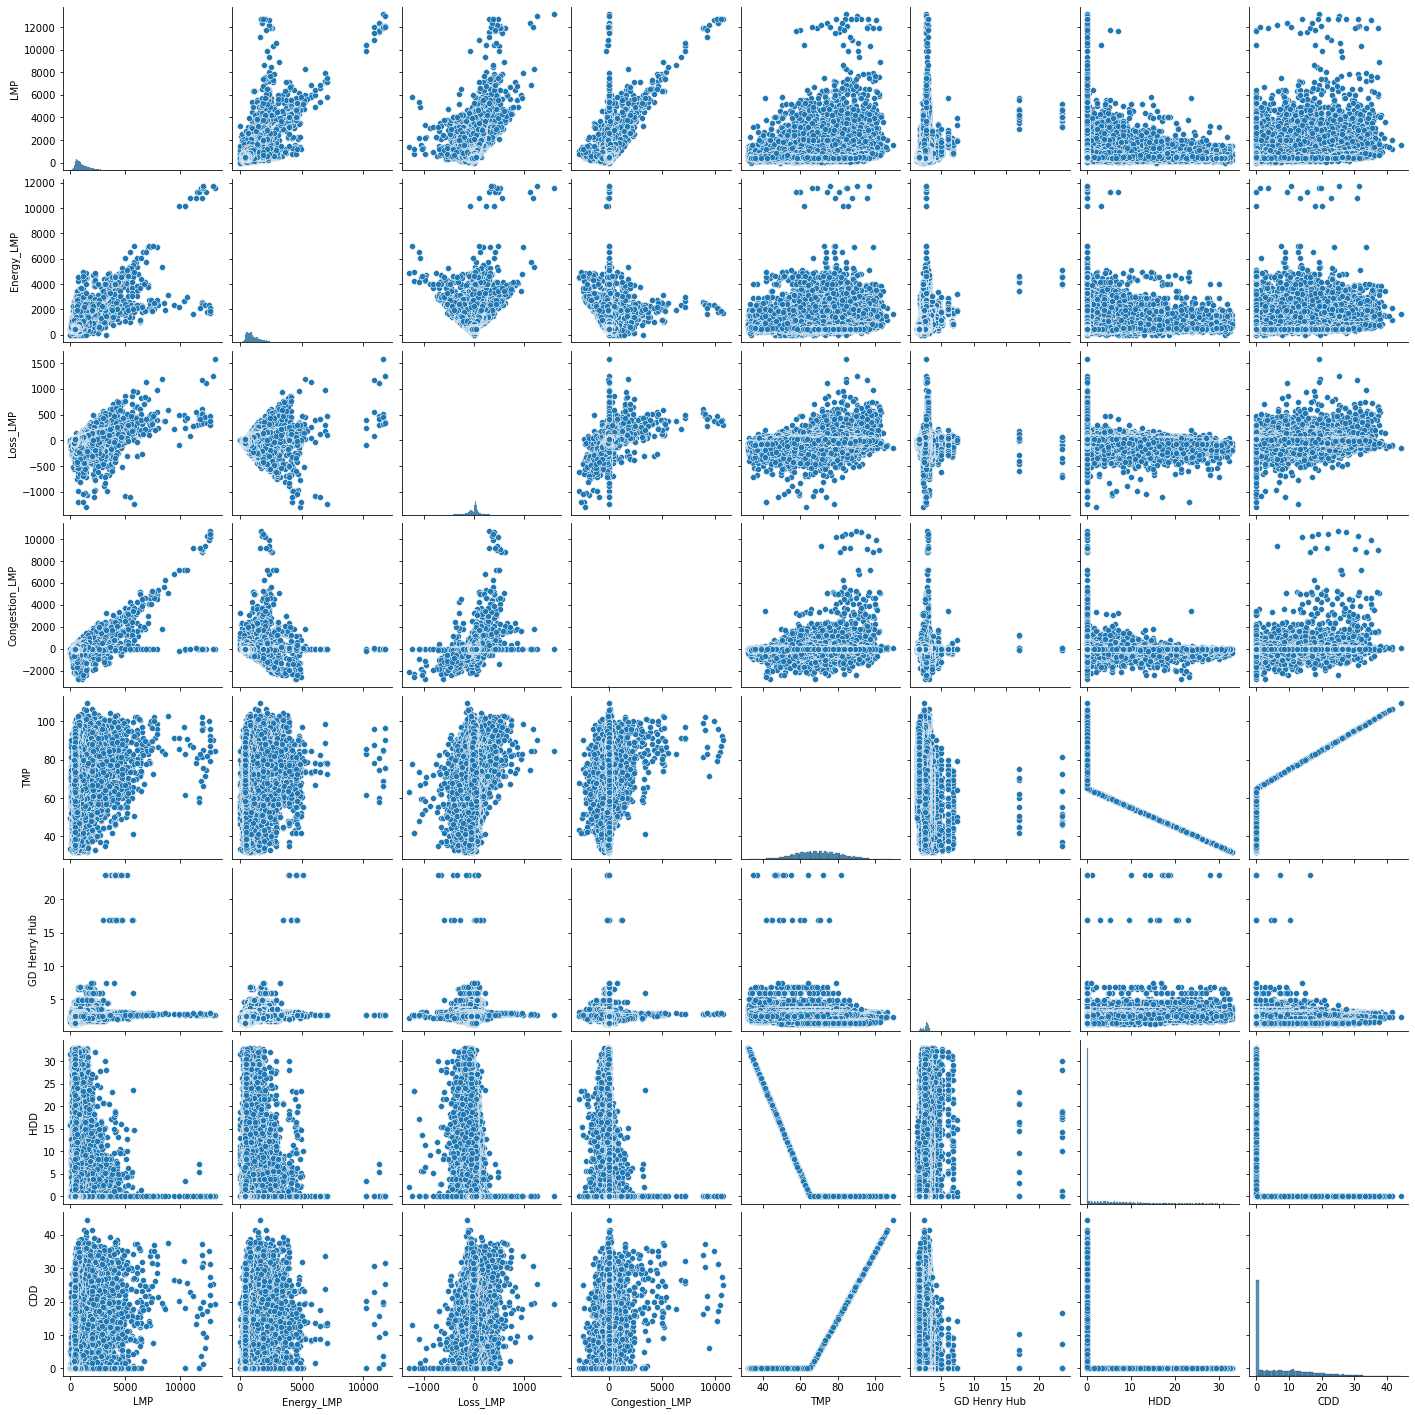

In [59]:
pairplot_df = temp_price_features.drop(['GD Houston ShipChl','TotalMWh', 'GD Waha', 'DirectMWh', 'IndirectMWh', 'LATITUDE', 'LONGITUDE','Population', 'Hour'], axis = 1)
g = sns.pairplot(pairplot_df)

For some reason, demand is not working when included in pairplot.

#### Scatter Plots of Demand vs Price 

<ipython-input-60-d631e3b79c15>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  demand_price = temp_price_features.groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()


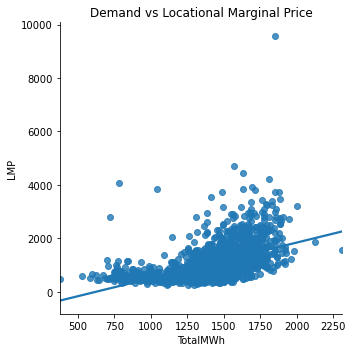

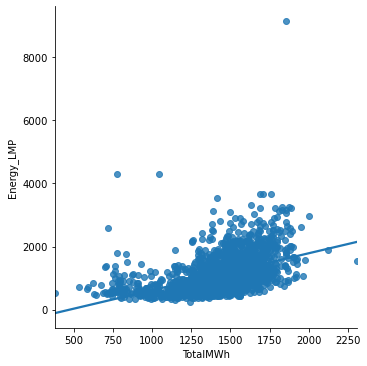

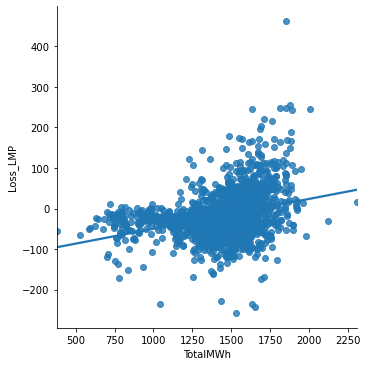

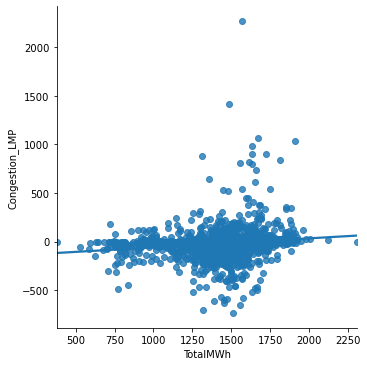

In [60]:
demand_price = temp_price_features.groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
#demand_price.plot(x = 'TotalMWh', y = 'LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Loss_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Congestion_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#sns.set(rc={'figure.figsize':(20,8)})
_ = sns.lmplot(x='TotalMWh', y='LMP', data=demand_price, ci=None)
plt.title('Demand vs Locational Marginal Price')
plt.tight_layout()
plt.savefig('demandvsprice.png')
_ = sns.lmplot(x='TotalMWh', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TotalMWh', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TotalMWh', y='Congestion_LMP', data=demand_price, ci=None)


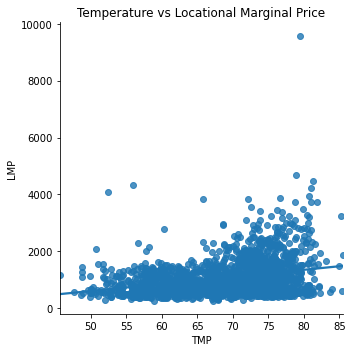

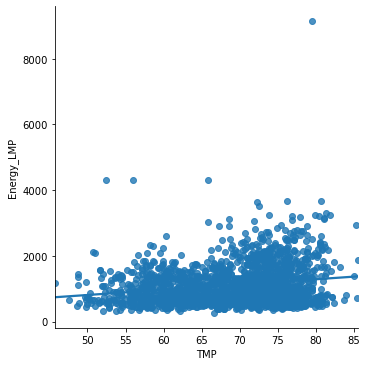

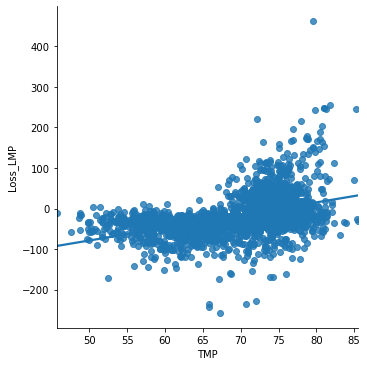

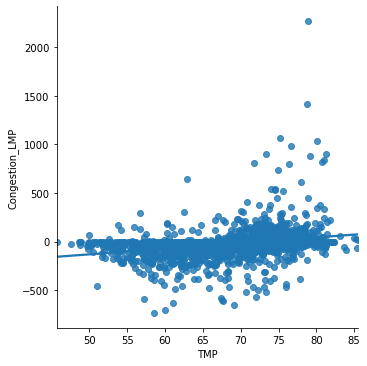

In [61]:
_ = sns.lmplot(x='TMP', y='LMP', data=demand_price, ci=None)
plt.title('Temperature vs Locational Marginal Price')
plt.tight_layout()
plt.savefig('tmpvsprice.png')
_ = sns.lmplot(x='TMP', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TMP', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TMP', y='Congestion_LMP', data=demand_price, ci=None)


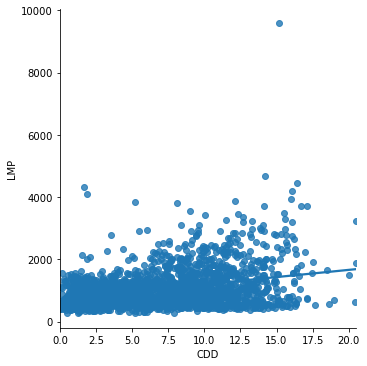

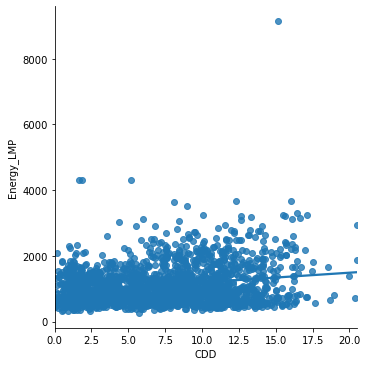

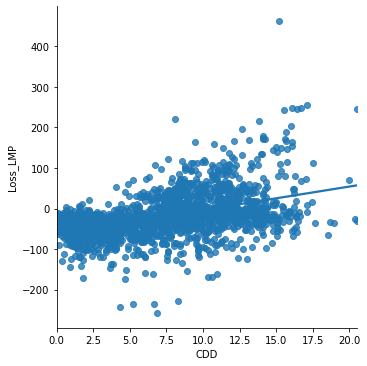

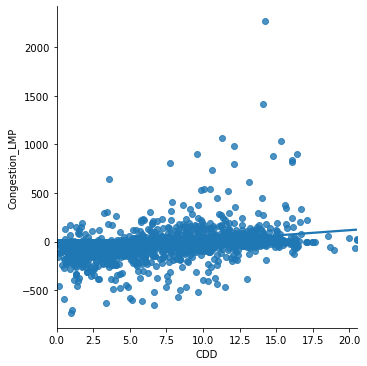

In [62]:
_ = sns.lmplot(x='CDD', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Congestion_LMP', data=demand_price, ci=None)


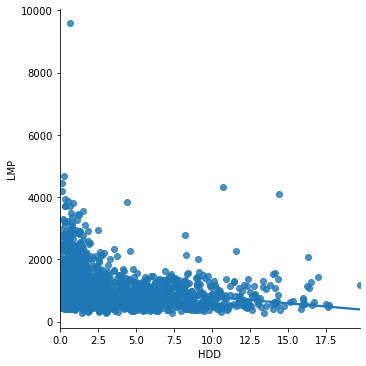

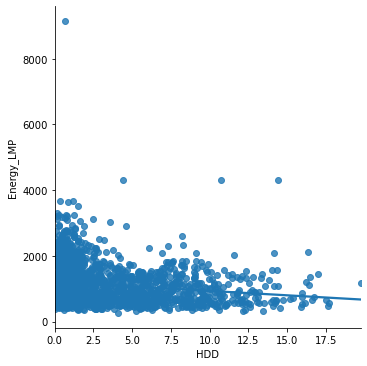

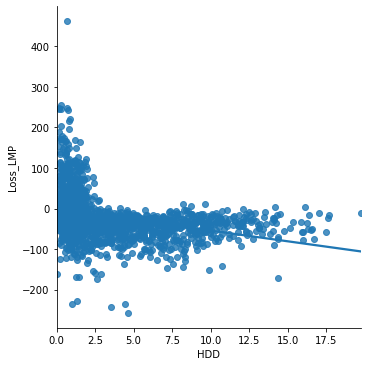

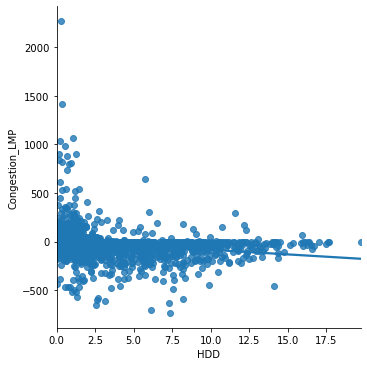

In [63]:
_ = sns.lmplot(x='HDD', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Congestion_LMP', data=demand_price, ci=None)

<ipython-input-64-98dc45701a94>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chi = temp_price_features[(temp_price_features['Zone'] == 'CHIHUAHUA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
<ipython-input-64-98dc45701a94>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  guad = temp_price_features[(temp_price_features['Zone'] == 'GUADALAJARA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
<ipython-input-64-98dc45701a94>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mont = temp_price_features[(temp_price_features['Zone'] == 'MONTERREY')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD',

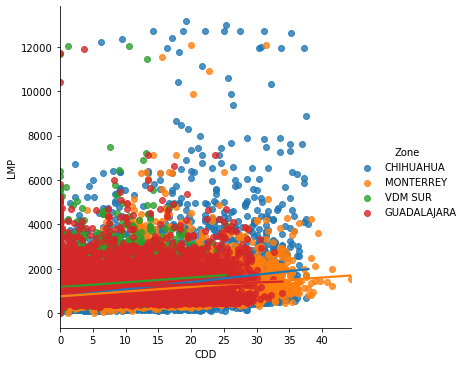

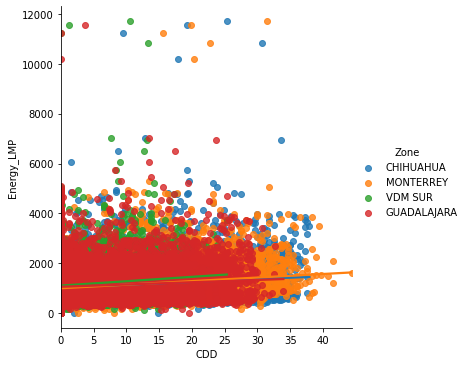

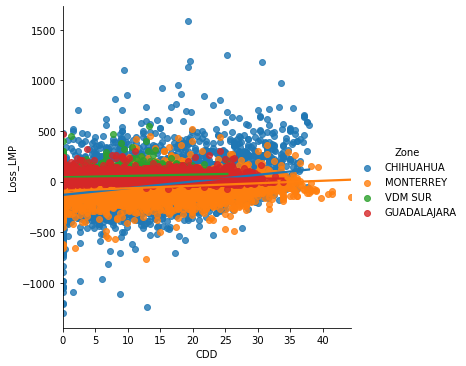

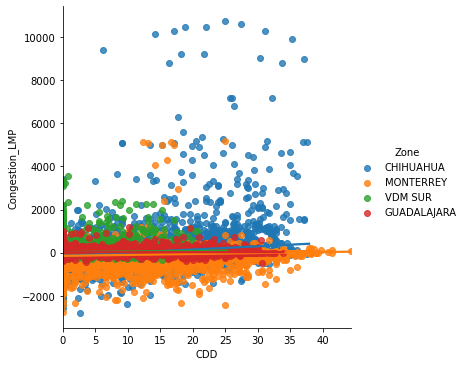

In [64]:
chi = temp_price_features[(temp_price_features['Zone'] == 'CHIHUAHUA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
guad = temp_price_features[(temp_price_features['Zone'] == 'GUADALAJARA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
mont = temp_price_features[(temp_price_features['Zone'] == 'MONTERREY')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
vdm = temp_price_features[(temp_price_features['Zone'] == 'VDM SUR')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()

#fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#fig.suptitle('Chihuahua CDD vs LMP Components')

_ = sns.lmplot( x='CDD', y='LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Energy_LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Loss_LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Congestion_LMP', data=temp_price_features,hue='Zone',ci=None)

## Summary

Through EDA, I made the following observations: <br>
$\;\;\;\;\;\;$    Noticed an error in Temp data <br>
$\;\;\;\;\;\;$    Observed the impact of hour of the day on price<br>
$\;\;\;\;\;\;$    Noticed that zone mainly effects the Congestion and Loss components of the price<br>
$\;\;\;\;\;\;$    Plotted the correlation between TEMP and LMP<br>
$\;\;\;\;\;\;$    Plotted the correlation between Price Index and LMP with outliers removed<br>
$\;\;\;\;\;\;$    Plotted Correlation Heat map and Pairplots.<br>

Using market knowledge, I have discovered that there was a methodology change in price calculation in 2017. 2016 data may be obsolete. This methodology change is shown in the time series LMP plot. The effect of the Coronavirus pandemic is also clear in this plot. Not sure if I want to use these time frames.  

In [65]:
# save the data to a new csv file
datapath = r"C:\Users\Zach Barrera\Documents\Zach\Springboard\Springboard\MexicoPowerPrices"
datapath_price_data = os.path.join(datapath, 'price_features_v2.csv')
datapath_price_data_temp = os.path.join(datapath, 'temp_price_features_v2.csv')
if not os.path.exists(datapath_price_data):
    price_features.to_csv(datapath_price_data, index=False)
if not os.path.exists(datapath_price_data_temp):
    temp_price_features.to_csv(datapath_price_data_temp, index=False)